# Homework 7 : PageRank (100 points)

*------------

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

# Pagerank on Yelp Social Network (100 points)
In this question, please implement the PageRank algorithm. 
* Please do NOT use any existing package/function for PageRank algorithm. Implement your own version of PageRank. 

In [1]:
import json
import numpy as np


# load users
users = []
for line in open('yelp_academic_dataset_user.json', 'r'):
    users.append(json.loads(line))

# friend counts
friend_count = [len(u['friends']) for u in users]
# remove users with less than 200 friends
users = [x for (x,y) in zip(users, friend_count) if y>200]
number_users=len(users)

# user ids
ids = [u['user_id'] for u in users]

# create dictionary for id index
d= {}
for i in range(len(ids)):
    d[ids[i]]=i


## Extract the Social Network 

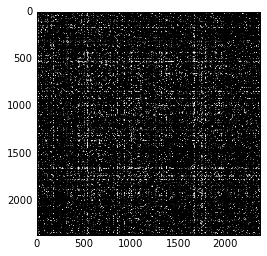

In [2]:
# Compute Affinity matrix 
A = np.zeros((number_users, number_users))

idx=0
for u in users:
    for f in u['friends']:
        if f in d:
            A[d[f]][idx]=1
    idx+=1

# plot affinity matrix
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(A,cmap=plt.cm.gray)
plt.show()

## PageRank

In [ ]:
a = 0.1 # 1-a is the "tax rate"
max_num_iterations= 100 # the maximium number of iterations
d,_ = A.shape # number of users

#Compute pagerank scores for the users
#--------------------------------------
# Insert your code here

# Step 1: compute the probability transition matrix P

# Step 2: compute the final transition matrix G with "tax rate" as 1-a.

# Step 3: initialize the vector of x randomly

# Step 4: ran multiple iterations of random walk, until either x no long changes, or it reached maximium number of iterations

#--------------------------------------

x= # the vector of pagerank scores for the users
x = x.reshape(d)
print x

## plot the results

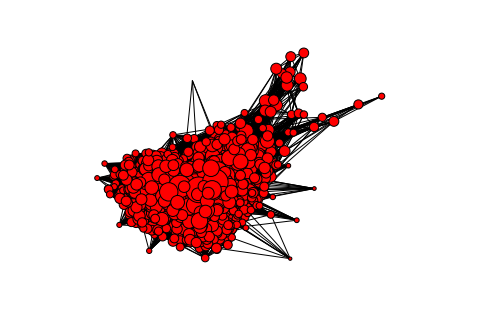

In [48]:
import networkx as nx
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
## normalize the pagerank scores into [0,1] range
x = min_max_scaler.fit_transform(x)

G = nx.from_numpy_matrix(A)
pos = nx.spring_layout(G)
nx.draw(G, node_size=np.floor(x* 1000))
plt.show()

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. 

** How to submit: **
  Please submit your notebook file through myWPI, in the Assignment "Homework 7".


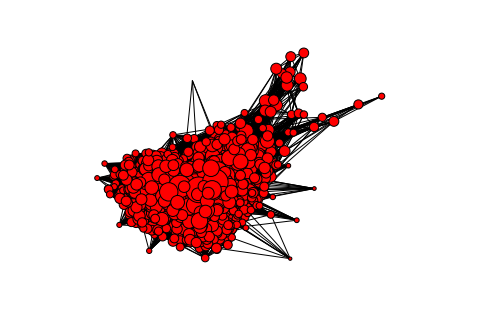

In [3]:
# Here's the original display
from IPython.core.display import display, HTML
img = "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeIAAAFBCAYAAACrYazjAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAIABJREFUeJzs3Xd4FNX6wPHvbMvupveEEDoBRKRKlaLSBVEpCioqKCKKXBBBUYFYsKAUERCuolgighcVvYoC6gUBBQXlClwEpAVCIIGQnmx2398fs1mTsCn4kyya83meeS6ZmZ05M+bm3dPeo4mIoCiKoiiKTxh8XQBFURRFqclUIFYURVEUH1KBWFEURVF8SAViRVEURfEhFYgVRVEUxYdUIFYURVEUH1KBWFEURVF8SAViRVEURfEhFYgVRVEUxYdUIFYURVEUH1KBWFEURVF8SAViRVEURfEhFYgVRVEUxYdUIFYURVEUH1KBWFEURVF8SAViRVEURfEhFYgVRVEUxYdUIFYURVEUH1KBWFEURVF8SAViRVEURfEhFYgVRVEUxYdUIFYURVEUH1KBWFEURVF8SAViRVEURfEhFYgVRVEUxYdUIFYURVEUH1KBWFEURVF8SAViRVEURfEhFYgVRVEUxYdUIFYURVEUH1KBWFEURVF8SAViRVEURfEhFYgVRVEUxYdUIFYURVEUH1KBWFEURVF8SAViRVEURfEhFYgVRVEUxYdUIFYURVEUH1KBWFEURVF8SAViRVEURfEhFYgVRVEUxYdUIFYURVEUH1KBWFEURVF8SAViRVEURfEhFYgVRVEUxYdUIFYURVEUHzL5ugCKoigXoqioiC+++IL9+/djtVrp3bs3DRo08HWxFOUP00REfF0IRVGUqliRlMSUBx8krrCQ9gUFZBmNrBGhc6dOLE1KIiYmxtdFVJQLpgKxoih/CW8uW8aM8eNZmZtLhxL784BZJhMrY2LY8tNPhIeH+6qIivKHqECsKMolLysri7oxMWzOzaVZOefca7EQNHYss+fPr9ayKcr/lxqspSiKT7hcLr788kuG9utHqwYN6HTZZTw5fTopKSnnnZv07rtcrWnlBmGAKYWFvLlsGQUFBRev0IpyEahArChKtcvMzKR3ly48PHgwvdauZdmhQzy3dy8ps2dzecOGvPfuu6XO37F5Mz1zciq8ZkMgGDh69OjFK7iiXARq1LSiKNVu+PXXU2/nTr4oKMBYYn/3/HzuB3rdcw+xcXH06NEDgAKHA2cVrlskgsGg6hfKX4vqI1YUpVpt376dYVdfzf6cnHJrAknAy5ddRu/Bg/n888/ZvXs3bQsL2eQsPxzvAvqHhnL41ClMJlXHUP461FdHRVGq1Zuvvso9eXkVNscNBvbu3cvp06d59NFHGTJkCD+6XGwp53wBnrJaGfPAAyoIK385KhArilKtjh04wGUuV4Xn+AHNgoIwGo2MGTOGqKgo3lyxgr7AKqCoxLkngLv8/Ehu3JjJjzxy8QquKBeJ+uqoKEq1CgoN5XQl5whwNDMT6y+/sGXLFhISEujduzdZwGjgfoOBloAEBPCjw8GIW25h3csvY7fbL3r5FeXPpmrEiqJUqxtvv523AwMrPGcrYAkL46uvviIhIYE33niDdevWAdC5Tx8KAwNx9ejBpPfe48jJkyxctoyAgIBqKL2i/PlUIFYUpVoNHDiQfSIklXM8F5hst/PwjBkYDAb27dvHqFGjANA0jYULF5Kdnc2QIUPo378/QUFB1VZ2RbkYVCBWFKXaFBYWct999xEcG8uDdjuTgOJZv07gE6Cb3U6TgQO57/77ycrK4sorrwTAZDJxww03kJycjL+/PwkJCT56CkX5c6lArChKtUhLS6NXr16kpaXx448/klVUxEIgAT0RR6jZzNjAQJrddBPL3nsPTdPo06cPWVlZaJqGiLBs2TJ+/PFHREStuKT8bajBWoqi/L/l5uayc+dO8vLyiIuLo1mz0sko9+zZw8CBAxk6dCgjR46kXbt2FBYWYjAY0DSNAqeTtJQU9u7dy6hRoxAREhMT2bp1KwB2u50bbriBkJAQvv/+e/Ly8oiPj/fFoyrKn04l9FAU5Q9LS0vj2cRElr/xBvWNRoI0jV8dDmLr1GHSjBnccsstfP7559xxxx0kJiayb98+3nnnHc6cOYOIYLPZcDgcGAwGCgoKEBHatWvHoEGDePLJJ3E6ndSpU4cTJ06QkZGBv78/9evXx+l0qlSWyt+GappWFOUPSU5OplPLluQuWcK2nBy2Z2ay4dw5DufmMv1//+PJ0aPp3b07o0aN4vbbb2fmzJnk5+fTvn17RISIiAgcDgf+/v74+/sD+mCs4cOHk5iYiNPpxGAwcPbsWe666y78/f3JzMwkJSWFJk2a+PjpFeXPo5qmFUW5YCLCkH79GHXqFI8WFZU6ZgQGAF1yc2mzaRNER7Nz507WrVuHwWCgRYsWAOTk5FC7dm3OnDnjGfmck5PDq6++isud8OO6667jiy++YMGCBQDs3LmT2NhYGjZsWG3PqigXmwrEiqJcsC1btnDm0CGmlgnCJYUCi0SYAKxfvx5N0zwjnRs3bkxOTg6FBQW4MjNxAC++8AIbv/2Ww4cPAxASEsKGDRsYN24cfn5+APz444+EhISoQKz8rahArCjKBXtz0SLG5OZW2rfVB3BkZfHLL7+wc+dODhw4gKZp4HJx5sQJegBDAWNmJl88/jjrHA409Cbq3NxcNE1j9uzZnuv9+OOPaJqmRkwrfysqECuKcsGO/fYbN1VhnKcBqJ2Xx9D+/UlOTQWgTnw8GQcPsgMoObb6DoeDZKAb0LB7d77auJHu3buXWsRBTV1S/o5UIFYU5YJZbTayq3iu0+Vi3PHjHAb+CaQlJ7OJ0kG4WG1gI9B00ybMZjP79+/H4XBgNpvJzMzk2LFjGAwGFYiVvxU1alpRlAt2zaBB/KsKCywcB/YCdwFzgV+AAJeLYxV8pjbQx+mk57XX0qBBA1avXg3oA7WaNWuGn58fwcHB/+9nUJRLhQrEiqJcsJF33MEXLhcHKjlvLjAcCEJfUekw0Aq4H7gFeA09t3RZA4AIm40JEyYwf/58QG+WrlevnqoNK387KhArinLBQkJCmDV7Nn3tdg56OS7AK+hrBz8O7AFaogfg3u5j1wFrgDrAsjKfLwIMRiODBg0iOTmZxx9/nKVz5rB7yxayTp/mP//5DyoXkfJ3oTJrKYryh3Xu0IEd27bRD7gDCERvil7qPv4R4AC6A8+5z9HKXGMveg14MnCfe98N/v5cN2cOToeDqZMm0cHl4taiIgKBQ8DrAQEYIyNJ+vhjz7xkRfmrUoFYUZQ/ZMeOHbRr144nn3ySmTNm4O9yYTYacYnwjstFX/Qmt2uAm4AHKrjWb0A7YDdwBn0FpoemTmX588+zJjeXsnm0BHgXeCgwkPWbN6tgrPylqaZpRVEumMvlYsCAAXTs2JG8vDw0g4FckwlLVBSt27blDPofl73ubUwl12sA3Aw8iV577nXddcx77jnWewnCoNeqbwOez8rijsGDVTO18pemArGiKBds8uTJpKWl8emnn/Luu+/SsGFDjEYjADNfeon7DQa+Az5EH5RlqcI1RwLvAdkWCx9/8AF35OVR2fpKI4HMEyf4/vvv/x9Poyi+pQKxoigX5Ndff+Xll19m9uzZnD59mtOnT3PFFVfgcrkQEY4fP06WCFej9xXHVPG6MYDZamXc/fdjAO6twmcMwF25uaxYvvwPPo2i+J4KxIqiVJmI0L9/fxISEpgwYQIffPABVquVkJAQioqKcLlcnvWE84EjwIkqXvsUYLVYcDgc5IlQt4qfqyvC6ePH/9DzKMqlQAViRVGqbNasWRw+fJjPPvsMgKSkJIqKisjMzMRut5ORkUF+fj4ARqORoKAgkoxGHFW49msGA+ccDtq3b0+Anx/nqlimDMDfvXqTovwVqUCs1Fj/+9//iImJoaCgwNdF+UtITk5m5syZTJkyhXr16rF//36OHz9Oz549OXjwIDabjcLCwlIDp6Kiosh3OvlnJdc+DCS5XETGxjJ9+nTCAgN5v4rlWhkYSO8bbviDT6UovqcCsVJjHT58mNTUVJ599llfF+WSV9wkHRMTw9NPPw3AqlWriImJoVevXhw5coS0tDTP+WazGYvFwoEDB8hGnyP8Dvq0o7L2A72AWLOZyxMSOHPmDEfS0ngOqOwr0nbgoDvxh6L8ValArNRYmZmZACxZssTHJbn0LV68mD179rBmzRoMBv3PxsqVK0lLS6Nbt26cPn3ac66maWiaRmFhIQA2YDTwDNAaPavWZ8AKYDDQAXgI+NrhYN3atURHRwOQDtxI6WD8GzAeiHZft4+m0e+mmy7acytKdVCBWKmxTp06hdls5uTJk/z000++Ls4l6/Tp00yaNIk77riD1q1bA3DgwAGSk5MJDAzktddeK3W+0WhE0zScTieg14JnoCfrmI1ei30ZWAn0RB/QNRaIB64C9u/fD0AesMlgoD7wIvBvoCN69q6t6IH6fREOrljBDb1743BUpSdaUS49KhArNdaJEyew2WzUr1+fRx55xNfFuWTdeOON2O12Fi5c6Nm3atUqmjZtSvPmzVm0aBGa9nviyqKiolL97g2ACPQ/Nr2A5cBaYDV6SsvAEve6Cb2mazAYCAoKos+NN3LKaGQGesKPRcAs9zXt7uuty82l6PvveXnevIvw9Ipy8alArNRYKSkpBAYGcvvtt7NhwwZVo/LinXfe4bvvvuP999/HarV69q9atYr8/Hw2bdrkmT9cHvMF3M/M73+U+vfvz9q1a6lbty65QD2LhcFePmMCnszLY/GcOSrDlvKXpAKxUmOdOHGCkJAQevTogdFo9Cy3p+jOnDnD2LFj6devH7169fLsP3jwIMeOHeOnn34iLCyMoqKiCq9zGKo0fQlgJ3qf8JQpU9i0aRPR0dGevvxrCgvPWzCiWHsgJS2NnJycKt5JUS4dKhArNVZKSgrh4eFkZWXRr18/Xn75ZV8X6ZJy2223AfD222+X2r9q1SpCQkKwWCxkZGRUWgt1AZ9U4X556M3Wi5YupUWLFsTExNCxY0dq165NZGQk58zl163zAKcIFktVkmkqyqVFBWKlxkpJSSEyMpKMjAxmzZpFcnIye/bs8XWxLglr1qxh/fr1LF68mJCQkFLHli5dSkpKCgaDgYyMDK+fL847DZCFPn0ps5J7JgKNExIYMWIEU6dOZe7cuWzZsoXdu3eTlpbGBw4H2eV8Ngno0727CsTKX5IKxEqNVFhYyLlz54iOjubcuXM0a9aM2rVr8+ijj/q6aD6XmZnJyJEjadu2radWXGzDhg0cPnwYf3//CmvCxSOmi50AOqNPPyorF5gCvGaz8fnGjUyfPp3w8HBuv/12Dh8+jMPhICEhAYAhQH6Zz+8EHrfZmPrUUxf2oIpyiTD5ugCK4gsnT54kOjqa0NBQT63ugQce4IknnqCgoAA/Pz8fl9B37rnnHvLz81m5cmWp0dA5OTnceuuttGzZ0ut0L03TEBGCg4M5d650gsoCYB/QHLgSGIq+ItNO9EQfdrudK7t1Y/jw4Xz99deEhoZiNpsJCQkhIyODw4cP4zSZ2FhURLzZzB0iRBcVsdnfn00iLF2+nM6dO1+0d6IoF5OqESs10okTJ4iNjfX8oQe4//77cblc582LrUnWr1/PRx99xJNPPkl8/O+LEIoIY8eOxeFwkJWV5fWzxTXkskG4WBF6bfZM8+ZMM5uZHhDAa0AOkOVysX79er799lvi4+NZtmwZnTt35ty5c2iahsViQdM0bhg+nI0//0zQY4+R+uCDDJg3jyOpqQweMuTPfRGKUo00UeP9lRroww8/ZPny5QwYMICtW7fy+uuvA3jyJh86dMjHJax+OTk51KtXj7CwMPbs2VOqn3fx4sW8/PLLHD9+nNzc3POankGv1ebm5lZ4j6uvvpodO3ZQq1Yt9u3bh8vlIjAwkOzsbKxWK1arla1bt3L//ffz/fffk52djc1mIzIyEhHht99+w2RSDXl/1N69e/nuu++IjY2lZ8+e6l1eIlSNWKmRUlJSiI2NPa8Zdfr06Rw7dqxGDtr6xz/+QVZWFh988EGpILxt2zZmzJhBnz59yM/P9xqEgUoXz7DZbGzevJns7GyOHj2KwWBA0zT69+8PgL+/P3Xr1uWqq64iNzfXE9Q7d+5MSkoK33zzjQocf1BRUREjhwzh2rZt+Xr8eBKHDaNpnTrs27fP10VTUIFYqaFOnDhBrVq1SjVNA3Tt2pWQkBBmzpzpu8L5wObNm3nnnXcYN24cLVq0IDMzk4WvvEKP1q3p17kzsTYb/1y06LykJxrghz7YpLwAXaygoIBGjRoREBBAbm4uU6ZMwWazsWTJEgICAsjIyOCXX36hUaNGHDt2DJfLhaZp/Oc//2Hx4sU0aNDgoj3/3938uXM5/vnnHMzL462cHLZmZTH55EluGThQJUG5BKhArNRIxTXisoFY0zTuvvtu1qxZQ15eng9LWH3y8vIYNmwYISEhPPPMM7wyfz51Y2L4zyOP8NBPP/GF08nco0cZ4XBgQw+8VvRUlLeh54GeCdQH/Mu5h9FoJDg4mJSUFLKysvjhhx945plnSEhI4NVXXyU7O5uioiI0TSM1NZWgoCD8/fWr9evXj9GjR1/09/B3tnzRIp7MzcVWYt8YETJPnGDXrl0+K5eiU4FYqZG8DdYqNmHCBJxOJ2+99ZaPSle9pk2bxtmzZ0lKSuLll15i4bRp/JCXx8qcHAYC7YBrgH+iT0OKQF+cIQV4C3gAeAw46P65+I998SpNAHFxcfTt25eMjAw+//xz2rRpQ3Z2NllZWSQmJnoWk7BarRQVFXHzzTeTk5ODzWbjvffeq54X8TclIqSeOkVUmf0GINJoLHdwnVJ9VCBWaqSUlBRq1arldapNbGwsrVu3Zvbs2T4qXfXZvn07S5YsYdCgQYSEhDBv1izW5+bSsJzzNwKR6CshBZc5pqEv2rAICABcLhcA9evX5/HHH2fFihX885//pHfv3mzdupXWrVtjMplwOBwcOXKE0NBQCgoKMBgMLF68GNCThxTXjJULs23bNtq2bYvRaCQzN5c3yxzfBxxwOmnXrp0PSqeUIopSA0VGRkpKSork5+eLyWQSl8tV6viqVavEYrHIzz//7KMSXnwFBQXSoEEDCQ4OlvT0dLn71lvlGaNRBMrd+oC8VcFxAXGAhOqrHwogn376qRgMBpk+fboUFBTIY489JtHR0bJixQqJjIwUPz8/6dy5s/Tr108ACQ0NFUA0TZOioiJfv6a/lKNHj8odd9whVqvV8/4NBoOMHDlSaoWEyIMWi6wHWQQSb7fLkkWLfF1kRURUIFZqnMLCQjGbzZ4/8jabTbKzs0udU1BQIHa7XUaMGOGLIlaLxx9/XAIDA+Xdd9+VvLw8CbJa5WQlQTYA5Gwl5wjIbe4g0KdPHzGZTDJy5EjZvXu3tG7dWvr37y979+6VNm3aiMViEbvdLqNGjZKioiKJj4/3BJBmzZr5+hVVK5fLJVu3bpUJY8fKyJtukicefVR+++23Sj+Xnp4uL7zwgkRHR3veHSAmk0kmT54sWVlZIiKSnJwsUydNku4tW8otAwbI119/fZGfSKkqFYiVGufYsWNSq1Ytz8+xsbGSnJx83nl33323WK1Wzx+yv5Off/5Z/P395eqrrxaXyyVHjx6VOLu90gDrB5JThUA8FqQ+SICmSadOnWTOnDkSHh4uS5Yskb1790rjxo0lLCxM4uPjxWKxSFFRkaSlpUlQUJAnkEyePNnXr6naZGRkSO8uXaShv788bTDIMpCJFotEWK0ycdw4cTqdpc7PycmR9957T1q1aiUGg0EAMRqNYjQaxWq1yoQJEyQ9Pd1HT6NcKNVHrNQ4xVOXinnrJwZ90BZAUlJStZWtOhQVFTFixAgA3njjDTRNw2AwUFjJcoYAzYDNlZwjwPfAEuBuEQ7u2sWqVav4/vvvqVevHt27d6dFixbk5+dz2223YbfbOX36NMOGDcPlcnkGeV1++eX/n8f8yxARBvftS4Pt29mXk8NjLhd3AXMKC9mfn8/3b75J4rRpFBUVsXbtWm644QZCQkIYMWIEP//8MzabjaCgIKxWK6NHj+bgwYPMmzePsLAwXz+aUlW+/iagKNXto48+koEDB3p+7tixo2zevNnruY0bN5ZGjRpVV9GqxaxZsyQ0NFReeuklz74ffvhBbCAHKqnpLgYZWMk5m0AagjhBXCBtLBZZtWqVzJ8/X6Kjo+X1118Xo9Eo48ePFxGRDh06yF133SVhYWHy0EMPSXh4uAAyadIkX72iarVp0yZJ8PeXonLeZzKIv9Eo/v7+YrFYBJDg4GAJCQmRunXrSnBwsIwYMUIOHDjg60dR/iAViJUaZ9GiRTJmzBjPz3379pV///vfXs995ZVXxG63y/bt26ureBfVnj17JCAgQFq0aOHpI8/IyJD4+HjxN5tlUiWDtbJBmoE85Q6yZY8fAKkL8l6Jfe+CNIiKkubNm8u6deskMDBQunTp4inTNddcIzabTVq2bCkFBQXi5+cngERHR583iO7v6L677pLnNa3C997D3fTcpEkTCQ4OljZt2kh0dLQMHDhQdu3a5etHUP6fVNO0UuMUT10q5m0ucbFbb70Vp9PJ/Pnzq6t4F43T6WTkyJEAvPXWWxiNRkSEm266ifT0dKY//TRLXC6K0zv8CCwGFgCfA070hB3vA8+jr6L0NvAzsAl9PvGVwCPALSXu2w84kZbGkiVLGDFiBCLC6tWrAThy5AhbtmzB5XLxwQcfUFBQQEFBAZGRkZw7d47t27df3JdyCTiTmkp8JdmtGmoaZrOZOnXqEBYWRmBgIKtXr2bNmjW0aNGimkqqXCwqECs1TnFWrWLl9RGDHqT79+/Pv/71r7984oMFCxZw5MgR7rvvPlq1agXAI488wqZNm5g7dy5Lly4lV4ROwOXAYOAn4H/Ak0AD4AlgIJAH1EIPyrcDk4EwYBcwtsx9LYBoGjfddBNxcXHMnDmTqKgoCgoKuPHGG7FYLFxxxRU0atSI1atXo2ka06ZNIz8/n7fffvuivxdf2r9/P//57jvOX1SytP8ajURHR5Oens7ixYv5+uuv1bKPfye+rpIrSnXr37+/fPLJJ56fp06dKrNmzSr3/HXr1klwcLAsXLiwOop3URw4cECCgoIkPj5ecnJyREQkKSlJNE2TMWPGSHBwsGe0chDIajivz3IRSCSIDSTe/e9GIC+B5FbQrLoVJNhgkMTERGncuLEUFBSIiMjYsWOlfv360q9fP7niiitERP9vo2maFBYWSlBQkAQGBv7tmqczMzNl2LBhYjKZPO882N3s7+39/QTibzBIUlLS3+5dKDoViJUap3Xr1vLDDz94fn722WdlypQp5Z7vdDolKipKGjVq9Jf8Q+h0OqVr164SEhIiX375pYiIbN26VTRN8yTUMJvNEhsbKzaQnV6CwQvuvt83SwRdF8gW9+CtziDnygkkQ0HuGT1amjRp4vkCtHz5comNjZV69epJcnKy2O12cTqdEh4eLnFxcSIi8vDDD4vBYJDvv//eZ+/uz+J0OiUxMVECAwNLzfX1fPkxm6Wr2Syny7y7/4LUtljkn0uW+PoRlItINU0rNU5xnuliFfURg54z+d577+X06dN899131VHEP0REyMnJ8aSWLLZ06VL279/PgAEDaNu2LY888gidOnUiJCQEf39/DAYDAwYM4FRKCsOBVmWuuwa9r3gLcAe/55LWgE7AR+hN2aO8lOk/wJcWC/F161K3bl2uu+46du3axT/+8Q8KCgp4//33iYuLIygoiKNHj3LmzBn69OkDQGJiIi6Xi9GjR/PQgw/yVGLiX27ZvhUrVlC/fn2MRiMzZswgKyvLc8xoNGI0Grn22mvxCwkhNTaWBmYzg0wmHgC6+/lxTUAAiQsXcveYMb57COXi8/U3AUWpTg6HQ8xmszgcDs++9957T4YNG1bh53777Tex2+1y6623XuwiXrCioiJ5/plnpHZYmFhNJokMDJRpkydLfn6+HDlyREJCQiQkJERGjRolwcHBYrFYpHbt2tK0aVOx2+0yceJEAcQfZIeXGm0Xd1N1RaN689xN1ftL/PwaSKjFInXq1BGTySTLli2Ts2fPSsOGDSUhIUGeffZZzzN06dJFZs6cKYB88803IiLyyvz5YtM0GeiukU8ymSTaZpNh113naV6/FP3www/Svn170TTNa+03JiZGjEajBAcHS1BQkNx5553y1Vdfyb333iuhoaEyaNAgefrpp2XlypWSl5fn68dRqoEKxEqNkpycLDExMaX2ffbZZ9KnT59KP3vVVVeJ3W6/5DIW3TtypHSz2+UndxD8FWSQzSYDrrlG2rZtK35+fhIYGCgPPfSQ1K5d29NXbLfbZcKECZ4AYQbJKBNg94HUQs8fXVk2rQkgbY1GucVikUCQbq1by/bt22Xs2LHSp08fadiwoURGRspll10m1157rTidTjl+/Ljcc/vtYjMaJUjTxA9kzB13yIL586WB3S4Hy9wjH2Swn5+0atpUhg8YIHcOGyaffPKJz3NSp6SkyKBBgzxTr0pumqaJ2WyW3r17S2BgoBgMBrFarTJ58mT573//Kw8//LCEhobK5MmTJS0tzafPofiGCsRKjbJ9+3Zp06ZNqX1btmyRDh06VPrZt99+W2JjY2Xu3LkXq3gXbP/+/RJhtUpWmYBVCFJb0zxzT0+cOCEtWrQQq9UqYWFhYrPZPIssFG82kMNlrvMFyLVVCMKCvhhEoDvw1KtXT3r06CF9+/YVm80miYmJMmzYMAkLCxNN06RHjx7yxRdfSN2oKJliMkkKvyevmGA0SpDBIFu93GMfSB2Q3iDLQV4BaRMQID07dZLc3Nxqffd5eXkyYcKEUgPdSm6BgYFit9tl3Lhx0qZNGzEYDGI0GmXixIly/PhxeeqppyQ8PFzGjBnjNcWqUnOoQKzUKGvWrJHrrruu1L49e/ZIkyZNKv1sTk6OBAQEXFKDthYuXCijrVavgfExELPBII8++qg0aNBqhvu6AAAgAElEQVRArFarWCwWsVqtnuxVZQPxM2Wu8Q36QKyqBOIlIMEmk3Tt2lXatGkjDRs2FLPZLBaLxZMPGfTFCAwGg1hBHvJync0gjb3sd4G0Rh+9XXJ/Ecgwq1UmuzN1XQin0ynbtm2T9evXVykYOp1OWbBggcTFxXkNvmazWRISEiQoKEgmTpwow4YNE4PBIAaDQXr16iWnT5+W+fPnS0xMjAwfPlx+/fXXP/KfXfmbMV3sPmhFuZSUHagFlQ/WKma32xk+fDgfffQRGzdupHv37hermFVmNBrJK+dYARBbqxZvvfUW6enpFBQUoGkaLpeL/Pz8887PA+YA9/P7WsNtgL3ACfR5wxV5C6h72WXUqlULPz8/UlJSOHv2LIMHDyYpKYmwsDCio6Pp3bs3BQUFLJ43jylO53nXSQev6yFvA7KBe8u+A+C5/HyuXLaMZ158EYvFUklJdStXrODRf/wDv5wcYoxGfi4ooFvXrixavvy835G1a9fy8MMPs3v3bkQEo9FY6nhCQgINGzZk69at9OzZE5fLxSuvvALov1/vv/8+x44do23btrRo0YK1a9fSsmXLKpVT+ftTgVipUcpm1YKKE3qUNXr0aD788EOWLFni00AsIqxdu5aZM2dyLj+f00BkieM5wBtAQUYGFouFgoICAFwuFyaTiaKiIjRNQ8pkdMoCegDrgAggED1L1jzghQrKswvYbbWy+NFHERGys7OZNm0aQ4YM4csvvyQ+Pp4zZ87QtWtXsrOzOXPmDH5AlJdr1UFPIuKidMah/eiZu7xN9agPGF0uzpw5Q0xMTAUl1SW98w6P3Hsv7+Xm0hl9BHg28PzXX9OjfXu+27WLkydP8sADD7Bx40aKioowmUwYDAacTidOpxO73c6wYcPw9/cnKSmJLl26MGTIEN544w2KiooICAhg4MCBXHvttYwfP57IyEjeffddrrrqqkrLp9Qwvq2QK0r1uueee2Tx4sWl9rlcLjGbzVUaoepyuaRJkyYSEBAgp06duljFLFd+fr68/vrrEhUVJZqmicViEQv6koOfgqSBfAXSEsTqZdBQ7dq1PU2ouJujLSAh7v/1c/+vFX1N4X+hzx2OAHkZ7/ml94DEmEzy9vLlnnI+99xzMnDgQJk4caJ069ZNwsPDZc+ePZ7jqampEmixeF3/2AVyhfveJfd/BdKmnGbxkyBBfn5V+m/ocDgkLjRUtpVzraFGo1jd78doNIrNZiv1Hlu3bi3Lly+XRx99VMLCwmTYsGEyePBgCQwMlODgYGnQoIFERkbK9OnTpV27dtKqVSv57LPPLpnuDOXSowKxUqMMGDBAPv744/P2R0ZGysmTJ6t0jdmzZ0ujRo3khRde+LOLV65Tp05JYmKiBAcHi8lkEpPJJN26dZOAgADPGr7BmiZW9AFTlNkMBoNn5Z7izQYyAyTdHYBSQSa79wNiQM+yFYQ+otqOvqrSKyDr3IFygDto/2PCBBHRv6j88ssvEhwcLGPGjJHw8HCJjIyUTp06Sa9evaRZs2aeQUwhVqtMLCcYDkCfTvVpieDvRE8qssZL4B5vMsndVZxatn79emkXGFhuX/dm97ssmfkqKChIenTtKrVDQ8VmMIgZJMbfX5o0aSJRUVHStm1biYyMlAYNGkjnzp2lU6dOkpCQIO+///55awkrSlmaSJm2KUX5G2vXrh2LFy/myiuvLLU/ISGBTz75hCZNmlR6jdTUVBo2bEhUVBQHDhzwrJ97MezevZt58+axYsUKNE0jOzuboUOHUlRUxDfffIOmaaSnpxMTE8O5c+fIz8/3NDcbjUac7j7Yss3QdmAqMN3LPf8BvIrex+yNHTADBqORDKcTzWCgc+fOpKSkcPz4cVwuF3a7nZycHOLj4/Hz82PSpEnEx8cTFxdHVFQUEydOJCkpCRtwj7sstYBjwCz0/uZc9EUmQtH7qk+gN4GbNY1RItyM3pS+wGBgowhdevfGYrGQl5dHfn4+eXl5Xv+dn5/PNcCGcp7vGNAUyNM0unfvzkMPPcRD991Hm5MnmVJURGv0BTC+AJ4wmfjNYKD5lVeye/du6tatS1paGjNnzuTOO+/EZFK9f0rlVCBWapRatWqxbds2ateuXWr/lVdeycKFC2nfvn2VrnP99dfz008/8frrr9OrV68/tYwiwrp165gzZw4//PADNpuN48eP06VLF+bMmcOQgQNJO3WKlkA9EQ4DP2kaBpOJPKezVGatksG4JD8gld8HZZV0Ar3PtbCScvr7+5Ofn09QUBA9e/bEbDaTkZHBhg0bMJvNhIWFkZqaSvPmzXE4HOTl5ZGdnc3JkyfPK4ugD7pyuf/t7d4JCQl069aNN998k5iwMPxcLswWCy06d+bM2bOcPHmSxMREAgMDsdlsWK1WbDYbGRkZ/Pe//2XHjh1s2LCBQ4cOEeZ+fm9hchUwzs+Pp+fPZ8CAAfTs2JGbkpN5xsu5hUBPTWOXzYbRauWxxx5j3LhxWK3WSt6eovxOfV1Tagyn00laWhrR0dHnHavqyOlio0ePZtKkSSxZsuRPC8T5+fm88847zJs3DwCbzcbZs2cJCwtj27ZtAPTq3Jkri4rYJEKdEp89KsI9Dgffotcki5UNwv7+/uTk5BCM9yAMes3URMWB2M/Pj7y8PGJjY2ncuDHt27fHarUyb9484uLiqFWrFrt37+aFF16gQ4cO+Pn58dlnnzFz5kzPNQwGA2az2TOQrDzBwcHs2LGDBg0aMHXqVEwmE4eOHy9V23Q6nQwcOJCvv/6acePG8e2333q2jIwMDAYD6enpnvMLgH8C95W5Vx7wrL8/N995JwsWLGDs2LGEAYnllM0C/FOEjk4n+/btIyIiosJnURSvfNgsrijV6sSJExIVFeX12JAhQ+T999+v8rUKCwslMjJSgoKC5MSJE+We53K5PIN0UlJS5LXXXpOFCxfK3r17PeecPHlSpk+fLlFRUdK3b18ZNmyYmM1mCQ8Pl5UrV8qpU6dk1KhRYtA06UD5Wa4cIB3L9A0bjUYxm82iaVqpubx+IGfKuU6ye8AWFWxXXHGFmM1madmypScl5YoVKyQuLk5atmwpV199tcyYMUNERDIyMuTGG2/0DBADfeCYtyxUZbe4uDj597//LSL6QDWLxSKJiYmed1dQUCBbtmyRF154Qfr16ydGo1EiIiJkxIgR0rt37/P6xUtuNpDx6ElCzoF8AnKl3S6dWraUiIgIqV+/vviZzV7nOpfdOgYFyYYNG6r8+6MoJalFH5Qaw9vUpWIXWiM2m82MHDmS+vXrs2zZsvOOf/zxx3Rt1QqzyYS/nx9tmzalad26fDVhAjsnT6ZHmzZcd/XVjBw5kqZNm5Kamsr48ePZvHkza9asYfr06bz++uskJSVRp04dkpKSCDGbeZ7ym7FMwPNAgPtnu92Oy+WiqKgIoHSTNTC/nOs8jz6dpyInTpygWbNmHDx4kI4dO5Kbm8uECRPIycmhT58+OBwOHn/8cf79739Tt25dPvroIxwOBwaDgXbt2iEiFdaEjUYjU6dO5dy5c/To0QOAcePG4efnR7t27Xj88cfp0aMHYWFh3H///Rw7doyRI0fyyCOPkJ6eTlJSEl9++SWFhefX64vnAPccOBDzAw9wdUgIcRYLk2Ji2GswcDAlhcLCQjp06ED7Nm2IPe8K54sCMjMzq3Cmonjh628CilJdPvnkE+nXr5/XY5MnT77gUdC//PKLRERESJ06dUrlOp734ovSwG6Xf4EUgMwDaeYelVxcg8oH6Q/SuXVr+fDDDyU+Pl4MBoPceOON8uCDD0pUVJR07NhROnfuLFdccYU8/fTTEoT36UNlRxAHl6n5hYeHS/Pmzb3WCKeBZ+m9FPR80TbKr6EW166LUzX26tVLRPQlC202m7z00ksSHh4uzzzzjDRo0MBT+wXEarVKvXr1Kq0Ft2zZUho3biwff/yxdOnSRVasWCH33HOPXpP385MePXrI448/LmvXrpWMjAzZuHGjXHnlleddx+R+ltog9UBsmia9unUTq9UqHTt2lI0bN8prr70m/fv3F4vFIkajUQwGg5hMJqlVq5ZnNPqIKrzzxgEBsn379j/+y6nUaCoQKzXG0qVLZdSoUV6PPfXUUzJt2rQLvmb79u2lcePGnubTU6dOSbCfX6mczZeBfO3lD/gpd3AApEmTJtKyZUsJDw+X+hER4mcwiAkkPiREZs2aJTabTWpXoYlUQGLdAchYScArDsYW9ClKfpw/97jsVrxogdlslnHjxslzzz0nhw8fFqPRKN26dRObzSZWq1UiIiIkLCxMrFarAKWaxb1tJY83atRIunTp4pnmNGjQIGnevLmEhoZKQUGBiOirYRU34Xu7lh2kL8j/SryXoyAj0adhRUVFScOGDcVisYjJZJKoqChp3769hISEeH1H5TXjC8h6kMvr1VPzhJU/TDVNKzXGn9k0XWzUqFEEBgby6quvArBq1SoGGo3UdR93APuA7l4+GwnUFcFqtdKmTRu6dOxIcF4e89LSyHG5yAFmZ2Tw4rRpmAwGzgJnKinPWSATeAaY4r5HYAXn56EPyspEH8CUX+J8M/qIZpPJhD9607dkZ2NwuYiy2/n444/Jycnh8ssvx+VycejQIRo1aoS/vz82m42srCxPKs3IyMjz7l3MYDDgcrkwGo0YDAZSUlK47bbbiIqK4ptvvmHhwoXs3buXuXPnMmPGDEJDQ2nQoAErV67E4XAA+vSsYuJy0R74FCg5GS0eWA7cYjSSl5HBoUOHMJvNiAinTp1i27ZtZGRkoGkaZrOZHj16EB4ejsFo5AZKD4Irdhi4225n+vPPlyqDolwIFYiVGsNbnulifyQQp6WlkXb6NAd27eLrL77gvffeIy0tjTp5evbnbGASen/sCS+fd6JPoXG5XHz77be8uXQpX+Xmcr37MxbgZuA/QF5ODuHoaSsr8iYwCJiIPh83BUhCT1dpLP9jGI1GTOjpJVcBRehB5j7Ar6iIJ9CDfJaIHujPncN4/DhL5s8nOzub6dOnk5WVRUpKCpmZmRw7dgyHw4G/vz9Go5HU1NRy7+1yubBYLOzZs4eAgADGjx/PgAEDOHPmDHl5eZ4+5TvvvJPnnnvO638nEUHTNCIiIggyGnm+gued6XTiKCzE5XKRk5OD0+nEYrFwzTXX0L59e5o3b07z5s05evQoWVlZBEdHE9G/P5f7+zPbYGAbsAmYaLHQ1mrloVmzGDpsWAVvV1Eq4dsKuaJUn+uvv14+/PBDr8c++eST81Zlqsgr8+dLsNUqI202WQLyLEiCxSINY2LkCpNJskE6gNwBcjvIg16aNN8CCTYYPH2owypo/uzibkIOB6/LAwrIdyCRIDu9HEsGiaqk2dkKcsLLZx8AmeRlfxZIW5ArmjTxpNuE3/uEjUZjufcqPubv7y+apsmDDz4ot912mxgMBqlbt26Fo52Lr1+8RUREyA033CChoaFy//33S7DZXGlfej30PuuhQ4fKoUOHJDExUcLCwqR79+4SEREh3bt3F7vdLu3bt5eMjAxxuVzy3XffyZ3DhknbRo2kY7Nm8shDD8mhQ4f+pN9OpSZTgVipMdq1ayffffed12MbN26ULl26VOk67779ttS32+W3Mn/cXSBPoqdmHApyk3vfKZCmILeiLyu43R3YigdFmc1m0UCeqiBw3Ic++CgIfTDWWJAf0AeA/eD+OQI9JWR519jsLlt5Ae6Gcj73P5C4co6loPctAxUGz+KtZNrI4i02NlbGjBkj9evXF7vdXml/MiXuZ7fbPYE9JCREAgICxErlg9ouCwiQnTt3ysaNG6Vp06bSunVriYqKkuHDh0urVq0kJCREbrnlFk+ftKJcTKppWqkxUlJS/t9N0y6Xi5lTp/Jmbi71yxzTgCeAK4DPgMfc+yKBrcDlwMPAaPQmaQAb4HA4EODbCu77HXo/0nKgP7ASuAZ9ucCbgWjgJ+C6Cq7RCYir4Li3lZAAwtFXc/ImBihOZ+JtqlBJQUFBnlWfQE9fGQycTU1l6dKlHDp0iNzc3FLTrMoyGo20bduWxMREGjdujMvlwmaz4XQ6ycjIIDs7GxPwdQXl2AecBl555RWGDBniKc8TTzzB+vXrOXLkCOPHjycpKanKSyoqyv+HSnGp1Agulwur1Up2drbXP67Hjh2jU6dOJCcnl9pfVFTEb7/9xt69e/nf//7Hpk2b2PX55xxxucqda/s2MAbKXSe4WDD6sn6b0QdKmdEDbusy532DHnwLgOHAO+jLBPZG78e9kG/TrwIPAfkGA6K3iHmORaP3ZZe93jLgX8C/y7nmImAypZ+3eABWsdq1a5OcnIzFYiHC3x/r2bM8hj6A6lNgCfpgsBD0vNI70fukcwCr1YrBYCAuLg6DwcD+/fsrDNYALdHfZdlEky5gsNnMNxYLdRo25Pjx4yQmJnL27Fnmzp2Ly+XipZdeYtSoURVeX1H+TCrFpVIjnD59muDg4HJrOGazmTNnzpCUlMTevXs9gffgwYPExsbStGlTmjVrRp06dcgwmdAqqP3VRx/sVIg+4MqbQvRRuNnADOAoegDvBswEhrmv8TZ6go3iIPch8BzQAT0V5XL0AH0Z0JXKE3E0QA/4RSbTeTXYLOBBYK77HNAXWXgM/QvDIPQvDzcCA/n9j0dxW7HBYMDPzw+TyURWVhagp8KMjY0lNTUVTdMwGo0Enj3LTvTWANBr9muAB9AHt2nu670MPArkFxRgsVjYv39/hc+maRpdu3Zl3759HDx9mi4izBbhavfx7cBjBgM/AAZ3YpAPPviASZMmsX//fkSEFStW0KdPn0reoqL8uVQgVv4S0tPTefHZZ/loxQpEhBtuvpnJ06ZVObdv8dSltLS0UoG2+N+pqank5+fz4YcfctlllzF48GCaNWtGQkICdrud7OxsFi5cyPPPP4/F6cRJ+aNyD6E3u36I3mzszUdAPfQm6+Lg+RjQHvgSPfjmowfskvmncoGn0AO8A1iHPt1oAXpt7xXg2greQ3HmaW/NyLnoo67fBa5GH3G9y339q4DGwCngRfRa9WqgFXozvMFmI9RuJz093dPUazAYMJlMnDx50jONyZSXRyK/B2Hcn491X7OYBkxAHyX+X02rMAtXrVq1+OSTT9i/f78n+5YtPJy7nniCCXPmcPTECTSXSx8dHRRE7dq1WbJkCVarlT59+hAfH09WVhYbNmygdeuy7RGKUg182UGtKFWRkZEhzerWlXssFtmBPir4XotFmsTHy5kzZ8473+l0yqFDh+Tzzz+XOXPmyD333CPNmzcXs9kswcHB0rFjR7nrrrvk+eeflzVr1sj+/fvF4XBIaGiopKWllbpWTk6OvPjiixIdHS033nij9OzZUwJBVpczCMgJ0hwkxD3AydvC9ydBaoGs8HJsKkgT9+f7gPRyD84KKDFIyQ5yD0hmic+5QP6NPmp6QwWDlJ6i8qQdxZsf+qAyp5frvA8SDfIt+qCz4ixUlQ22CkIfrFbyWs+4n9tbeaeVcx1N02T06NGSnp4uTqdTHnvsMalbt660b99ebDabpKSkiIjIjh07pEWLFhIbGyvBwcGyYMECcTgc8tprr0lERIT07dtXmjdvLkeOHKmW32VF8UYFYuWS99wzz8hwq/W8P9K3Wa0y4YEHZNWqVfLkk0/K8OHDpXXr1mK32yUuLk6uvfZaeeCBB2TWrFnSq1cvadmypXzxxRfnLdTucrmkqKhI6tevLwcOHBARkby8PJk3b57ExsbKddddJx06dPAEAEACQTaWKU8ueuamtugLMDwNEg/yEsgB9zbHHcBCQNqANHCfPwvkK/TpSc+CZJS4bgFIkjuI4Q7O5Y0K/hQ9k5e341kgYVUMwoD0qOA+ApKInsXLfAHXtIE8X+Y6y0BuLOce/ct83t/fXxYsWCB5eXkiIpKZmSmDBg2Srl27ysiRI8VoNMqOHTskJydHJk+eLEFBQRIaGiq33367nDx5UnJzc+Wuu+6SZs2aSc+ePaVHjx5y9uzZav+dVpSS1GAt5ZJ3Tdu2TNmxg75l9q8HhhkMRDVuTP369WnUqBGNGzemSZMmREdH4+fnx0vPPMO/PviAXi4XkS4XW2w2soOCePfDD/Hz8+OFmTNZ/emnFDqdhJhMjJowgdq1azNr1ixCQ0NJT08nLS0Ng8GAwWDAaDR6mkltQCP0puA09KbonuiL2gcB6cANwC/ozdgG9L7Xs8AQ9AFdMehNwG8C7wF3AIvLeQ//BTq6r3+5+7x16E3XzYB7gb7oo7aXojcngz6g6yX35/zQ+56Ls2iVN+QpAL35vKJm7jT0wVb5FZzjTSB6k3xz98/n3Nf5Ev35im1D7zMvABo2bMiLL77I9ddfj8GgDyc7ePAggwYNokuXLjRu3JgpU6awevVqbDYbd999Nw6Hg7CwMJYsWULXrl05ePAgQ4YMoUGDBhw7doyEhARef/11/Pz8LvAJFOVP5utvAopSmb6dO8sqL7Wl1SVqibhrqxaLRYKCgiQsLEyCLBbpTOk8wS6Qf4HYNU3smiazQdLRm1+/AmntrrWVXNwgIiKi0rmtJvQl9Yrvcw7kCpCH3P/+HH2ub22QX8up/e1xH3+/nOMu9PnJHdDnDD+K3ky/D+QN9Bp2H/Ra+VL3Z35Er4FPQc+1LCX2X4/ezO3teQwghRXUhou3hhdQGy65+YFcCzLG/cx+7vc+EuSfIHe5f27RooVs2bLlvN+JDRs2SHR0tCxcuFA+/vhjMRgMMn36dLn55pslODhYAgMDZe7cueJwOERE5OOPP5bIyEh54oknpGHDhjJt2jSVG1q5ZKhArFzy3njjDelktZYKDIUg7Sr5Y2+jdBNvyW0a3hNY5KP38eIOxlUNLFaQmfyemWo6+qo9L7gDYWf0Lw3esl6V3L5H71suGwRXgrREb7qOhPOSiQh6c/itII3Qs3bloDcdf1DOvVzoXx5KJvmwoQd5I3pTe2WBuAFVW1yiqpsBJEDTpG2rVrJx48bzfhdcLpcsWLBAoqOjZcOGDbJr1y4xGo1y1VVXeQLwzTff7Fkj2uFwyKOPPirx8fGydOlSiYmJkSVLllT3r7CiVEgFYuWS98svv4gdfRDTqyBL0JcV9Nc0iY6OFqPR6Fn4PiAgwLOk4M0VBJAj7qDm7dhH6H3A5QWLQPQBVFb0tJOd0FNZDkbv+x2Cnk5yJMiVIHvR+3ivrUJgE5CrygTPOe6A9wVI1woCq7iDZwB6bbcFSPdK7lXA760K/iB3glzuLoO3VoiS2yGQUH7PrPVnbN27d5fU1FSvvwcFBQVy9913y+WXXy4HDx6U1NRUsVqtEhgYKEFBQVK/fn35+uuvPeefPHlSrr76aunZs6e88cYbEhER4VklS1EuJaqPWLmknTlzhnr16pGdnY2IYAfCQkNJPnsWTdOIi4sjLCyMvLw8UlJSKCgooPhX+h9FRcwu57r56P243mYDp6JPLSrb92kH2gLjgVBgLXrf7gvoc2x/RM/YtAG9vzcUPcNTCHrGrZbA/VV45jnoU6AWAAfQM2LtQI9UVwLHqXje4Tj0xBy/oi/8cEMl95uIPmc3HOgM9EOfLzwPfXEDczmfu999LAX4gPP7m4vnA1dG0zRq1apFVlYWZ8+e9fQBl3Tq1CkGDx5MeHg4b7/9NgCxsbHk5uZis9mYMWMGEydOxGzWS7t582ZuueUW7rzzTsLDw3nhhRdYs2YN7dq1q0KJFKV6qRSXyiWrsLCQli1bYnBngQJ9rmv3/v2x2Wxomsbx48eJiopC0zSmTp1KQEAA0dHRGAwGvqzg2pvRk2B4c5Lz5wj7A1OBjcBQ9EFZL6IPOnoYPXA/j556cgf6/7EcQBf0QUkfua9RFf7oA7NGATehD+CKR5/DW5vKJ/83Rv8ScNJdrso0Rv+S0Qb9i8Ot6IPJItAzeZVN/FkIPIk+uOpx9EBudx8zoA8IG+I+p7f7Z280TSMkJIT69euTkpLC7NmzvQbhn376ifbt29OjRw9Wr17Nzz//THh4ODk5OfTp04dff/2VKVOmeJY0nDdvHjfddBOLFi0iNzeXJUuWsHnzZhWElUuXL6vjilIel8sl7dq1E39/f8/i8sXbuHHj5MEHHxRAmjdvLkajUaZMmSK1atWSdevWSc+ePUXTNLGBfOmlSbXQ3WQ828uxIvTVkrQyTaYR7mPemmifRu+bFZA09EFag9AXYyg+5y68r2DkbRuH3k+9FH2xiG/d+39D728urxzF23j0JvM66IPEKrvfY+j97fXd9yven4c+mCrE3WT9DMgEdxl683t/eAa/T2GKcjdZl7z+D5SeBw1IdHS02O12iY+Plw4dOkh0dLTXwVMrV66UiIgIef/99yUjI0NGjBjhGTj39ttvlzo3MzNThg4dKm3atJG9e/fKkCFDpGvXrpKenl5dv7aK8oeoQKxckoYOHSpms1l69OghJpNJNE3zzOGdOHGiFBQUCOgJJFq1aiXBwcHy2GOPidFo9KzIA/qo4GdBTqOPjP4P+qhjf5BW6KsHFaGPwO6Je7AQ+oCp8SCPgPwfe+cdHlWV///XTPqkQwIhQEIVEZWmgKCCroqK2JVVsbJ2Udcuq67Iyori2tcudtcuu1bsuiAIggXXTgkKIhBICIG0+fz+eJ/JTIaZzLD79QfqfT/PeZLce+695557c9/n03sie288IvsU2awNbBTylI6Ov/3SEdimBKRYi2zX37m/dwWbFbF/CLJhxzt+I3Lm6gz2R2jVTh5aeHRGscc9XIvu8yPYLW4uJiObd+T+KkfEucS3X19LOJFIyK5/wgkn2OjRo83v99uzzz7b4vk3NTXZlVdeaWVlZTZ//nx74oknLDc3t7l84ltvvdWi/8KFC61Xr1522mmn2ffff2/Dhg2zMWPGNMcbe/CwLcMjYg/bHCZMmGB+v9+uvPJK69ixo1ap/QoAACAASURBVIFqx5aUlJjf77fzzjvPzMz69u1raWlp1r9/f0tNTbXU1FTLyMjYzAEoC4UX+aIks3TXSpGD0jlgJWAvRxHp3WBjWyGzOUgK/gpJhPHI9kDiZ5Ayd80/0tKb+2zkgR36+3kkuS6LcXwT2B/cdfwoUUgWmyceiWx/Q2SfA/a+I8sNCcg7us11x/uIH/L0NVr8hDJvXX755VZUVGSDBg2ybt26tXj+1dXVduihh9qwYcNs/vz5NnjwYEtLS7NevXoZYA8//HCL/o8//rgVFRXZtGnT7LvvvrPtttvOLrnkks0St3jwsK3CI2IP2xQeeOAB8/v9NnXqVOvUqZPl5+c3S8K9evSwPL/fBg8caEuWLLGnnnrKQPHDnTp1MsD8fn/S9WxDJH0wUvu2QdJtNIkscftq4pDMeSgc6lqwc1shrJ+Q5Hwq2PdR+yrATkGezmvctkoU/1uI6g6H+t6IFgyTEPkvQ+FNA5EkX4DU6zejOsb5YH+PGv9yRPqdwRYizYGB7Q92/xYS8VhE/P5WSHxhiKx9Pjv66KNtxIgRdumll5rP57N33nmn+fl/9913tuOOO9rJJ59sV1xxhaWnp1ubNm3sr3/9q/n9frviiiua+9bV1dk555xj3bt3t48//tjmzJljHTp0sNtvv31rvLoePPzX8IjYwzaDt956y1JSUmz8+PF27rnn2oEHHmiA9ezZ0zLBTklJsQfBzvL7LTclxfLz85tVlbBlcb+h1gZJsFciiTge2ZyAkmlES7v/QlLwMrCLkRq8NdJag2KKM1E40wnuZyayDa91/W5zhHos2NHIdvthxHnmo7SQee4edkZhRNcjVXHkNeeBHeQIuR+SgAvc74eAvYOSahjSBvQjsR06cnGRjRY0AbD74vS72OezdLBOnTrZtGnTbMCAAbbTTjvZTjvt1OL5t2/f3i688ELr2LGjpaam2nnnnWeff/65paen21FHHdXct6KiwoYMGWKHHHKIrV271qZPn25FRUU2ffr0rfHqevDwP8EjYg/bBL744gvLyMiwkSNH2ty5c619+/bWpUsXAyw3JcVei/qwzwELREi+qampW0zCmWB/dufrCvZxK4RT6wixA5J6J6EY3Y5gH7g+U5G0m4i8jkXS426OIAc4Ig3tvwVsO8JJO4JIPV6OknrsB9YFxRZPA/sM2YXfSnDdZcgBrADlpF7nfh/lzmVIvb0PygIWq9hDZFsPNgxl+BpJWPU/M6JPKJNZlttX3qaNFfr9NmrkSAPs448/tmAwaHfccYcVFxfb8OHDze/3W79+/WzRokVWVVVl+fn5NmDAgGZnrtdff91KSkpsypQpzceWlJTYnDlztvJb7MHDfwePiD1sdaxcudLy8/Otd+/eVltbawMGDLDJkycbYKWlpc2OUNFtD1QEYEsJONTywWa7c2URX/Uc2RY68t0RpaKsi9j3PVIjR0ukkS1EfsVIou2LnMKGuP2r3P7FMY5tRHbc51Dhhyvc9sOQGjoZCdZQoo7B7vdT3L3vEjXG3VBikq9iHB904+iNUly+iBYjoQxdWUjFfiQi+Gx3f68hW/Fs5I2d7fPZrTfdZKeddpqVlpZaVlaW5eTk2KOPPmpmZo2NjdalSxcrLS21+vp6a2pqskmTJlmHDh3s7bfftqamJrvkkkusZ8+ezcU6PHj4JcJL6OFhq6G+vp6nnnqKc886i8b6eq694QY2btzIK6+8Qk1NDfPmzWPQoEHkfvghb8Q4fiyqnZsI6Si+dQAqsvARKlgQRAkrBqKY2c9QXdxE2Med43s2jw0+BdgIPMLm8b4NKEY3D/gCOAJ4EngF6A58g+rvLgQeSjCGz1Ht4h4o6ce3SY4dVJO4G6on/B5wLSoaMQYVkxiOkpn8BbgPFZEY6e51NfC4u5dTgHaoBnIH4DWgpEMH1qxZQ319Pe3ataPqp5+Y7o6PxiJgmN9PVXo6dfX1HHPMMdx3331kZmYCsMcee/Dxxx+zZMkSfD4fxx9/PNXV1Tz55JO0bduWk046iYqKCqZPn550XWoPHrZJbO2VgIdfNurr6+2jjz6yl156ySZceqntPWCAHbj77vbAAw/Ypk2b4h736MMPW4f8fNvV77frkFr34EDAssBOPu64Zqm1Xbt2FkBq0EiprJ7kSvplIvVppHNUEOx1JxGf5v7ujTyIE0mTa5zEegDYHTH21yI17WAkMa9z7UmwQe64jU5inI1sswtQiszrkLPUP5OUbLdHKT8PcnPxrzj96lGYViiEy5Bq/Rx3zYAb85kofnl7sEdcv01gj7m56olCs96gpVd5A1K3Z0NzyskHHnjA8lJS7KYE9zAXLMfvt/nz57d4P0488URLTU21zz//3ObNm2ddu3a1Cy64wOrr662ystL23HNPO+KII6y2tvbnfsU9ePjZ4RGxh81QU1Nj999/v1103nl2y8032+rVqzfr09TUZNdPnmylBQXWPRCwHEcmryLV5++ys63/dtvZE088Ya+++qpVVVU1H3vfPfdYeSBgH8X4MC9xRJCF1J5noopIe6H80IY8fo9CTkXFKAQpHhGXEr94wXvIbnmfI5keJA7duQYl75iP4n3/HaNPgyPe4e4+0sH2RJ7NDajKUns3rvFgeyMyDjldJbL1htquhFXrH7hzvhyx/0tHtiFVeAFSFV+PikIc7Ob1AHf/p7o5eQfZqK9x473dzVNrc1OH1PJpaWnWo0cPy8zMtCyw6iTuY2hurj333HPN78fkyZPN7/fbyy+/bPfcc48VFxfb008/bWZmixcvtt69e9sf//hHLzzJw68GHhF7aIGPP/7YSgsL7eCcHLsObGxWlrUJBOyVV15p0e/sceNst0DAPnWEEB3y0oRsl9unp9vuubkWSE21HTp1suEDB1qmz9fs4BTL/ngzYW/gHEdixW5bJ0coZztiqESOS7FIOBsSSmQ7uHO/4gj2AOLbih9CzlrfIRtuiNyuZHOJexbY4ahQRRFyWArtPwF5OPsRUZejRUCu63trEuS1ES0EIuOJ/004achz7lxXEC5/GETEfSyycw9x/Z9BNuGpiID7IkLu6MYUoHWP8lC7nJaLosFJHGOoatWVf/qTmZk988wz5vP5bOrUqXbSSSdZnz597MsvvzQzs3nz5llpaandfPPN/9//Lzx4+DnhEbGHZjQ2Nlq3khJ7IupDOROsTSBglZWVZubIOivLqpDHbhmxw10+dx/yUDWg+8AeBDvGbe/uPva9HWEsQ1LYjo5Ugkit+rjr/xKSmNciqThU4jBetaR85F3dGgmc4Y5tctc6wY13NEqB+YG7/jC3/RK0AOiDFgxfo0VBIVI97+3IrAdSda9H0nOxm6tJKAZ4tTs2Fy0kQtm/3nD3H52ZK7o9ghy2orfvAzbRXS+WxiHUbnX3cx2SokcSJusHUEjWZNcnB6mnExHqdLB8F/MNYQe0RO0asAmXXWZz5861lJQUGzt2rPXt29eOO+44q6mpMTOzl156yYqKijbLwOXBw68BHhF7aMaMGTNsl9zcmB/L32dl2ZQpU2z9+vV2zqmn2tUpKWaOOEbE+cA2oJCWz2PsW47spBeiONfxSMLLQ/bM6P4vOII6C0mh7ZHEuxfKNuUnnEIR93cZUpW3RgK/d+fdgOKAi5AH8eFISsxCpDoNqXr3RgTfN+o81WjB8joi3ujQn2uQmrzEnXsTUgcfgqTbSGm6H0raEW/MPyApOta9PeXu++4kCHB/lOjjZpQLO3LfvWiBlO7m9VC04LiM8CIp+nyPgxVExHXnRN1bvLZfTo7dfvvtlpWVZf3797fi4mL7+9//3hyudPfdd1v79u1t1qxZW/k/xIOHnwceEf8GUVdXZ3PmzLFZs2Y1Sxxmymp1QnZ2zI/lJMKFECJzCi8jftapN5F0GO8DvNyR2o/u7/Npmd4xsjUhqXMs2LduWx3YE0iyTkeq0FCR+jxUqKC11JTrXb/hSHo7hnCO51D7Hux0JAGvctt6gT2aBMFEthWO0K53BNUWkXpDjL5LUFzzOYRjiUP3+w8kQU9Ettx/gb0dMbbXSGzPDbU3kE16B3eO6PkuQZJ1NtIc3ILirnu64xZEHbMvLTUSOUgD0toYvgQrzsmxNm3aWJs2baysrMxmz55tZir8MWHCBOvevbt9/fXXW+vfxYOHnx0eEf+GEAwG7W/XX28l+fm2c26u7ZqXZ4VZWXbSMcfYXXfdZccfc4x1TkuLmchhN1p6Il8Xse8A5H0cedxaJFHdG7HtR/fx/g/hDFXjkAq0EcUFnxF13Y1IVboLItsiJKUejog+6M7b3l0rCy0YChF55iOVdixiPwWpZNsi0m5NHXwxUq9/7cYRL590SJ0e+rsSqai3Q4URAm58WWye5jKyrUTagiKU8GN3N85SlNCjAGXoOsDNWwFadJzntiezOGhEmoPtY9x7NZKsz2RzZ7cmtBApJkzGC5Dd2xehmg6R8fw41/8JrG92trVv29bS0tJsn332sVWrVpmZFotjx461wYMH28qVK7fyf44HDz8vPCL+DeGqyy6z/oGAfRbxMVyK1Ls57oPcERUmCNl8g8i2m0XYASpUKCHk9VuM1LfbIdXlGUjSzEOq0heQtFSAyLmbI5hLUSrHo915dkbSZogUVqL8yfsiMg2NqRqpVHs4omhCoUR9HNEdgeye7yCbbwCR7iywb9yYhiEnsBfQwmJ1AtLa6MZ8CpIUI/fVItV1P1RcIh8tBMrcfB1LS3XuzUglnQxZ1iIHq3cIe0D/hbAWIdTWEM5B3YXEWbFChOontpf2BKQhaG1x8iBy1HvT3TO0JOLMzEwLZGVZAL0TC939LAO7zu+3joGAlZWUGGDnn3++NTY2mpnZ2rVrba+99rJDDjnENmzYsJX/azx4+PnhEfFvBCtXrrSCzMwWH/A1yJnpQ2RznOg+5L3dz4PcRz2ApLkiZE8tdiTTw5HZOvfBftedYwpSH9/miKgMORdF2gu/dsSSj9TC7ZAUPRBJ25uQFHx5K2RQhSTFy9wYUpHa/DxaSqVzEDH2Qirf3yGVdqgucbKkeB5aXEQScchTuZe79jhks34ZEWYZklgj7d7DiS2lt9YmIrv08gT9KlG411mtzFvkvHR2/VYgT/BaN/ftkdo4kUTdjvAiDbCcnBzLyMiwzp0722677dZcS3qPIUOsrG1bS09JsbbZ2XbSmDHWr18/A1p4QVdUVFifPn3snHPOaSZmDx5+7fCI+DeCO++8044LBMyQRDIWSVcDkc2vHZKMv0aEO41wsXccobQDu9N9qBc6clsX4wMd2U5Dtt94+19FZH26+7sCkX03RLKJyCSUEvJ7JN39hJyQoqW5u9jc/vysu8erkyTDO5DmINsR4iw3V4ci1f1PccjqakTUoapK2xPbgS1e+wCFbcVyYovV1hJOPdlavzHuvN2Q2rvMzeUhtMx93Vq7EL0fXbp0aS7CEQgErEePHpaenm4FBQWWmZnZ4l2sqqqy/v37G9CiUtKCBQusY8eONnXq1GZHLQ8efgvw/1fpuDz84rBu3To61tWxDBgGdEFpEecBXwMvAmuAW4GTUbrHPu7YHKAYuAY4A8gA7gXGAfkJrnsxSkO5Kc7+kcAlwIfu787Ax0AWcBHgi3OcATOB81EKywEoTeVXwLMoBeV7Ef2PBma43xei9IzHA7sD1RH9gsCbwE3A9cDDQJXbV43SQ2YBdwJHAX9y13oZzVE0UoA/o7SR10aNP1ncBlyA0nMmgwLgKuCGVvq8ALwEdEJpLL8DngAeBDLduJNBIZAGrP/hB7q0b08wGMTn85Geng7ovbvtttua+y9cuJA+ffqwYMECrr76as4++2wAXnvtNfbdd19uuukmLrzwQny+eE/eg4dfIbb2SsDD/x9Mnz7ddsnOtsFI5fw68si9D2VOmoHUmt3ctlCqQ5DqsYRwgYMgUmnGyioVq+0A9omT1EL20d+hhB/3IJVoJpJq/4liav0oQ1fomqFUi0cjiXdHN6apYF+4dpMb/x+Qh++YiDHUII/qNHc/Kcjbew5Sy9e7eQh5BJ8LdpEbY4E75w7I0WoHpA0YjqThkU4yvBCp1WOpdBc5qXMDCveKl44yuq1E6vvKJPuH2kakKr+Wlh7ty5AqP9uNYwnKqFWAvM53I2zjXpjEdY5C1Zuecs+iM1hhWpoNHjzYUlJSrLCwsPkdfPTRR62wsNBSUlLs+OOPb95+//33W/v27e3999/fGv8aHjxsdUTnpfewjaC6upp77rqLOW++SbcdduCs88+nvLz8vzpXZWUl/3jgAT7fsIE9gVwkDa4HDkJSzQPAWiS5/ROoBVa44/3AUCR5giTLTUgyTgbpwFTgX8ABqFhDHpLAnwQudWPaGRUf2BU4C7gDGA/s5665ozu2LSoYcC+S4A5BxQ+2B/4AjHJjWxAxhheRJFuDChakISl5V3ftfYA6d77daCmJ/wjcCFSg4gb7A48C65D0fiLQHjBUCGI4sBNwthubD+jqxjfL3c9taO4TYTaa+8Ik+kYi093Tk2jue7j7XoqKO/iA04E9gGNREYqQxL0WuBvYExVy2CXONSqB11HRiseAp9Gc5DY08OXcuTQFgzzyyCPU1dVxwQUX8Nprr1FXV8egQYN4+OGHMTMmTpzIww8/zLvvvkuvXr228C49ePh1wKu+tA2ipqaGYf360Wv5cg7fuJF5aWk8mpXFO3PmsP3222/RudatW8eeAwey1/ffM7G+niBSTR8KXEG4elBI1TsGqEcf6kpEwn5gBPCq63sIsBKppk9NcP21SA0+FJFc+6j9DYiQNgB/R2QciUcRob0A7BW1z4C7gMnAB0jNCiLMnRAZ9Ufk+ylSK2e6+08B5iPyrUUk+S4i63i4Ey0aurpj/gIcRniBEkIdqmz0F1SBqSea0y8Qyb+LCGshUsW3hkfQvCdTZSoaZ6JndwUi4DSgFzI1nIFI9Dzg3BjHNiLV/N/QM9gTCETsbwJOQO/IPLSwexWR+XGuz11AbXk5GW3aUFZWxocffkh6ejrfffcdwWCQ0047jYULF/Liiy/Svn30m+HBw28HHhFvg7j9ttt487LLeK62tlkyu87nY+7IkVx9/fWsW7eOyspKqqqqqKqqorq6murqatavX09NTQ0bNmxgw4YN1NbWsvirrxi+ahWPmOEDLkSkd1eca/8HlQWsQ0SXhz6sDwNL0Ie9Kyp9NwXZkluz5o1CRPgGIoJo/BGV/3s+xn5D0tjlwJGtXONSZL+90/39ESLtvZDU+wki6o/cvdyFiLgJ2UVPBRaT2AYbRPe+HTCdlsQUCxvQgqcB2bLXofucgRYN7YB3iD0vITyHyPj5BNeKhePRs3k4xr4zkF17CXqmIWxEEvTdaNFUgGzkSxDxXo60EVe4vl+5sd2GFhU3EH4fDC2i5vXpg2Vl8fXXX7Ns2TIAjjzySNLT03nooYdo27btf3F3Hjz8irBVFeMeYuKUMWPsnihb3KfEzqecqGUSzkRV6+yUi2jd7jfSHZvm7KTVKL54LPL2LXF2xCIUohPvPB8je2x0tqpQC5UUjOVtbMh+25XEMbE/uPNUIS/uDijO+BS3/Uh3H+ch23IHZzvdiMKvDkvCFmrIvj2E5NI2hlotsr1Glkz8EYUjZbt9rWXB+hqFi8VLIBKvNSGP6Cvj7B8IdlXUtvUovvpQZNOP3LcI2ZJz3bhPRIlYTkB27AJiV1pai95Bn89nzz//vFVUVNjOO+9sBxxwgLXLy7M0v996l5XZp59+urX/7Tx42GrwvKa3QfTq14+Zrjh6CO8jiWxL0R4VnQd5xhYjqa41HIlsoZ0I21BnI9Xjbm4cHyAV798Je1mHUIUk5j2RV3K3ONd5EKmlY3kbA/wbGE1LiS0WSpFt+RMkPfYGJgLlSGJ7GklqN7txvgjMAfZG6uGxCc4PuudbXMtM0DcSWUjCvJnw82uPvJrfQh7rZcgjfUXUsXOR2r0BeYJvCV5HPgAnxdjXiDzmO0RtPx1J+8+yuYmgK3AP8oL3AX2RNH8UMgV0Q+9JNAqQ5N+nTx/OPPNMysvLaWhoYPabb/JcdTV1wSCXVlRw0O9+x6ZN8XzrPXj4dcMj4m0Q4049lXdyc7koNZWZ6CN+MVJ1xkMKsVXEkWEoyQaEGHJIao8+siCnnwakzn0fkV0FUnt2cf27o5CnctdnX2RPjoe5KHwpHhrY3P4aD+nIDvsUIuT7Edm1i9F3AFKn7oDmp00S538NOYkNSnI8kRiGCPmtqO2D0KIgiNTzOyCnqp3cmPZD83wTIvO6JK/XBExCBB9rEfQ0uu+vIrZVoIXWbbT+UbgCzcNfEaFnAh2R6ro2Rv8aYBUKW/rxxx8xM7744gsG1dczDL2TJwKZmzaxaNGiJO/Qg4dfFzwi3gbRtm1bZi5YQMO4cVy4/fa8tueezR85n8/XIsYygD62fwbOQVJJpM3xB+An93t3YDWSjFtDiKRWIyloLXA1+sCfhqQm3HUy3bWXIJvjP5AN8Uk3tmzio47WpcseyK6bCJuQ93JXRCjjkW26NfiRHTQFeW8nwsMkdkyLBx+at5Ctdh2SrPsgD+v1KOZ5EvAM8iwfhuZvJLLNdkOSe32Ca4We0UJk/47GLOSg9TdgGmFyn4bs5609r9C9XITmfBmyd3dw450ao/9fiL0A/AYROWj+f6qvp02bZJZEHjz8CrG1deMeksPYsWOb8/j6/X7Lzc21rJQUO5yWtYB/dDZFCNuIJ0TsvwilYYxnW/zUHVNAOIvUQGdXzXc2y1DfS1DsbLxznYdssaG/61CpvANRGsaOKGY43vF1KNXifxLYQx92/S5GNumVW2BLPRbFVSfqtwfK97wldtrINgPFTs9BNvZjwN5z97jR7T8EZbdqg7JxXYts2JuQrfkQZMOdweZ286A73x7IjjsK1SMOuvYJyl5WBPaKO2Y0io8Ogh3n5jGZe5mDSljmo3dkmWs9UJ7vZ1F1roPQ+0NUy8nJsQDYkLQ0m+DzWe/sbLv8ggu29r+YBw9bDZ7X9C8Ea9eupVu3btTU1BAMytqYAfwnGKRLVN9bgAlIVehDUvKNKNxoHYod3R+pbvPcMYZsfscj++o6JOm+iCTBSneu1RHXWYTUqwuIHYbzjrvmtyh705UoFvgPSNqdjzyvvyW+2vwmFD7zBrFjab9Att6xyOY82I05WfyIJOmv49xDCIORiWC3LTh3JN5DkuRSNBej4/SbhrJo9UEhYtshyfFJ9BwfQPb3jUjqz0c2+ReQGjjD9e/u7mkderaZyGP+DMK24XXIK70cqfbHENumHI0PkBf4VCSxF7h7Goae1T+RvftLwFJTSU1VuoJevXpRWlrK66+/zsSJEyktLaVi6VL6DxjA6NHxZsSDh98AtvZKwEPymDZtmpWUlFhmZqalpqZaCrFzMb9MuBpODqph2wdlnZqAagtv56TH0ci7eCe37fmI8zzipJxQ2b32Ma51o+szO2p7JcpOlYs8bLeDFlWfQlLcTigrUzzpK4ik7nKU+arKbf8e1cYtdpJcKHPWOUlKdZGtCHkvx/L6DbWRJJ8NK1Z7FknCreXdDrULXL+73ZwfhApvnObm+XuUdexQtz8XaSeKUU7tyIIXG5HX+u9Q7u7GqGud7+Ytg+S9x68GO9k9m56E37N8lFkrE6wgLc18Pp/l5OTYHnvsYW+//baNHDnSMjIyWhR58ODBg3lFH35JaGpqsqFDh1q3bt0sEAhYLpsXdDdUeSeA0kT6HYnlIPVyAIUE9UJqw8kozeQ7bE7qQdd3EOEqO7FSLT7k+g1wH+jDEXEfjioidSC+ungOIsLXWvnwv+c+8nuhEoxpqArSmbRMw5iGVK1bSpJtkIq6nxtHtNp3MSLqY/6Lc4fasYgMO7ifrVU2WuLGVIOKb2SjmsbXoPCrEOnluHnPc+e9rJVz1qFKU/dFbGtE4Wy4ltHKcwq1evQuHO7+Ps8dm5aWZuXl5QZYSkqKpaen27777mtz5syxlStXWt++fS0QCNhtt922tf+NPHjY5uAR8S8Mn3zyibVt29by8/MtHVXZCdlQm8CeRGR7B4pV7YYk4lDO5lWIfHPdBzURgVyGyNSPCPPGOP0akdQ3GVVoWgF2hfvQv5rgGu8jye5gZL9cgwj/DWQXLUJ20dDiYBObLxoqEREnWzUokvSyUI7lPyEy7oHs6KejfNJZbhwFbHnOZ0Nx0gXuvurBbnXz8rcY9xFqg9y8GJKEQ3b+P7tn+ixhybcGScLtkQ0+3jheQbb50DWfo2Vserq7bry45ka00DrA3c9qpIHwR5zD7/dbr1697MMPPzQzsy+++MI6d+5s+fn5Hgl78BAHHhH/AnH++edbeVGR3YTUte2Qirczko6eQ8Xey4lfOu9NRNjrE5DI1Y6gfnT9O9KyiECVG8MOSEoLORuVu/4dSK5IfQ3YvcgxLMPdRw933qokjr/ZHZuPnJSSJcmLUd3jYY5cypD0uwMi4D0jzjcWqfW3lIivdAQWue1bpEE4m9hkvDfhxceXiGSfQEk64iVAWYgWLfESqDS5+TkdLSxyiJ0Apjsi9LqI415GGom90DtzqOvTG5kuAkgSvuaaa5rf03feeceKioqsqKjIbr311q34H+PBw7YNj4h/gVi8eLFlErZpbgKbhzIlhdSnhyIbY2sEsR+qFtRanxGEbbhT3Yd8OJKaXkOS3ZGI+CMJ5UNkl74iCaIKIhX1n5E9eADK2FXriGVeguOrkf01wxHVASRH/svc+I8mXEWpKyLlF2MQ3iJ3nReSOHeoPQNWiiTv6H1ViPQvjzEf3WiZ3Wo4sgE/mOB6F6HFRfT2Ne55F6H35CE3x6VsnrGtLVKf5yFSbuOeyX2EyfkkZF/e3o13IlifLl2a6wg/8sgjVlRUZB06dLCbbrppK//HePCwbcMj4l8QGhoabN68eXbyySdbaYyP7UQkvTYhWKNW2AAAIABJREFUNW0iafcZ93F/nNhS2Ye0LH9oqNRgDpLC2xBWn8ZqpyE1dWtjmIsk2a5IDT4FpVLMQ85D9zuy+DjO8WuROrUnKpP4tvv7VDZ3TIom4W7u3H9zc/ESCqdqB9YQ57hj3dhuo6VTVHSrR6UYS2hdQl+NtAxvR2x7E9mCI5/Jke6Z1iaYz0/cXERu2+Tm5NwY99WEbM+FaCETkorXuLF9DbY8aixBwqUgX404z3bZ2fb+++/bxIkTrXPnzlZWVmZTp07d2v82Hjxs8/CIeCvikYcesn7dulnPkhI7Z9w4q62tbbF/06ZN9v7779s111xjw4YNs8zMTGvTpo0VZGZaHpvnH34KqQ7rIa5HdWR7A9kM+yAJJ1KKnInUyrE8mhcite3MBOc/FxF3vP2zkYT2GJtLsDWImLdDklihI6OXUb7rWUitm+1ad2TnHezOmY+ktftoafNc4s5b4FqsGOWhxI6p/QAR62zkgVyKVPffuWexEamcr3JzNxzsmwRzZMgbu6sbZx2SPiNtuYZU5nlJnGuZu3bktgeRqru19+H3YOPdNYpoGf8d3d5CUvTzUdtv8Plsh65drW/fvta1a1ebMmXKVvrP8uDhlwWPiLcSnn7qKSsPBOxtRwaHZWbaEQceaM8884wdd9xx1r17d0tNTbXMzExLSUmxvLw869Spk5WXl1thSooNReFFkR/COkcOLyJ7cXTi/ug2BXkZ17gP/2DChRFykPPOEWALwOYjiftilCziiCRI4W7ih8Q0OvKZnuAcF6DCAlXIAW0PZH8uAOuCPL7XRR0TBFuKvMfbIUmvs5ubNkil+iXYA277D+641Ujdfj6yeR6DJPJPkCR5kLtepPR5BiLnNNc6oAVCpDd3Mm0UksxHoYQn2yM7bmh/AC0uKhKc51Uk/UZu2y2JeZ6NFjOvu3tohxz/osn7I0TUw2Oc4yWwsvx869mzp02ePHlr/4t58PCLgUfEWwkjhwyxZyM+YhvdhzzaeSZWy0Mk2p7N7aezHEn1Y3MHoWjS7oZss+aIKeA+siciiWhfJPnkIRK7GKluT3DXOIbNSTCyVSNJdlmMff9ExJ+IoCIrNG0EG4MchOYkcWyIlG9145hESzW7Iel4ZxTak+cI5lyk4r8ELSS6InVtDvE9ikMZrLaEfKMJNM9duwbZo/MJax3KkS17QoLz7EdLm3Ote4ark5inVCTZ74xMCj3B+iLV9RTCNubbIKZp5B9g7QMBmzRp0tb+9/Lg4ReF1J8tU4iHVtHU1NQiz3IaySf+rkYVcm5HmY2GAb9DmZXuR/mDP0H5fPuh3MuRmas2ofzF/VB1JVDB+IEoV/Mk4F6UmakOFZLfGzgcZZjyofzIlwD7AG+7PtHIRfmL/8Lm9Y+fQcn+E6GNu8fnXCtEGbmSrYDkQ/d/kDtPJspwBfAvVK2ph9t2AC2LZETiKpQtKl4N4mQLasTDvm5sM1BFqwyUN/oYlPu7BOVkfptwZrRo3IwqVn2I7isLWO72Japr1AAYkOrOXYkyY73urlmFsq5NR+/f1THO8aDPxy577cUVV1yR6HY9ePAQAa/ow1bCUSefzKWBAN+gD9tpxCeBWFiIUlFeh6of3YkI7weU/tBQtabLUbrEm4HHgD+hlI4pKB1hJIEMRGkVd0aFHqa7vxegsnfHIgKvRyT7d0RiU1oZ5zWECxpYxPZKVL4wGZS6sWa4n1tShjCErqj60S0oBeYpKE3jYygV50G0Pv9fIwL8ueBH838YWvzUoEIa44CDUfnGOWjhdCJKR/kKKnbxtBvbFJSussH9vJvwIilRGcXn3TlSXAu6MY1E79hUlEY0ExF9r6jjPwf+nZLCE0/EKjXhwYOH1uDlmt5KMDOuv/Zapk6Zwoa6OvYbPpxgVhZvv/02paWl7LPPPrz44otUVFS0ep4cJE3viIilFn04FxMuS3cAyqO8HtUYPhmV14vG74BPgZmEKyxFohbVny0CHnLbQrmel6J8xU3AS+jDvxp9uLuiMoKFwKVI4joRVR5KpqLR71FlpyUkV7JwEyqHOBeRUhe0gChFJHwCqpX8GImrDdUQXsCYu8ddgLMQSa1CWoiXkMTahHIv7wacSex5jofJaAF0Q9T2SmAEqsDUGS1GGtFzb4dI90TgCLRY+QCRdxYi8BmoMteXxM7XXQsMRSUOj3T3dwVwaIy+5u77OMIajU+A/VNTmXLffZxwYjJ6Dg8ePETCI+JtCGbGLbfcwtVXX43f72fs2LFcdNFFvPHGG9x6660sXLgQn89HY2Mjfr+fYDBIBvAuUhmH0IjI8d/ow1mM1KqtSXy1rt87hNXV8fr1RkS7i9s2ENWx/RoViuiIyK4TIsW3gceRpNcDEUseUvPOSzAnVYhAb0QFC1qDIYn3Wje2/RFZfYqI+UBElOtRkYREdpl5qJ7yIHftfojYZyCyrHHnOhJpCzqgOa5ExHwfmquL0WIoEe5HZQrvj7FvNSpNORMtRrZDEn7fOOdagBY641DhjF5I+/EYel4h/ActKspR0YwFaJEyCZF2DXpm+yIJ+SJUgGISes8eQqUqNwGBQICysjJ23HFHhg0bxqhRo+jZs2cSd+7Bw28cW9NA7SE2ZsyYYcXFxTZ06FDr2LGjPfvssxYMBq2ystKmTZtmI0aMsLS0NAMlXojlfPMB4cxJOSgrU2vOOueieN5kHIv+SktHsN+5v3uguOB4jlt/dH3eR965xe5ndN8vkPf2CBS2U4g8lh9GDlvxxnW5czT6Ksa+KpS2soDkyiR+iTyHo0N0DIVQFTkHptZSXtY5B6YyN2eJnLnuR2Fk8fZfgrzI7ye50o0j3bPf6MaaiRy3dkBe70OQh/RfUfjYYuSYtofrOwpl4ervnlVbsPyUFCspKrIRAwdau+xs23HHHe3cc8+1ESNGWJs2bczv91t6erqlpqYaYD6fz/Lz861///42btw4e+SRR2z16tVb+1/Mg4dtCp5EvI3im2++4ZBDDmG77bbjyy+/ZLvttuP222+nrKwMgClTpnDLLbfQb8UKViIV6TBUanAHJMkUEi6+no3K0+0d41qvI5XzRFQ0PhG+deepQLbEEnf+2UD7BMdORJLijki68yFp+UAkRd6E7I3j3DUKkCRdgSS2+ci+ewFSy4bwDlK5z0Wq81gwJKkXueu0hjFIqr44avubSPp9geRLIv6ApPOxSDUfD1OQTf5vcfZ/gdTC+yINyGkJrnsXeh9CpoN5SEJfBLRFjmBHIGn2aSQtb0fY9NA24lzvITt6TocOdOvWjXnz5tHY2EhBQQFdunShrKyMsrIyOnToQFpaGps2bWL16tV88sknLFy4kNWrV+Pz+TAzgsEgKSkpFBYW0rNnT4YOHcq+++7LXnvtRXp6eoK78uDh1wePiLdhVFdXc+yxx7J+/Xr69OnDtGnT2L5XLw4aPZqnn36ahpoasn/4gZuQHfY54Hr00VyFPto+RECNSG06AHkRlyCP2nuAr9z2IxGZJcJKRKSrkO33OOSlm4z61dBC4QjkSPYRqk9cjeyv1yPv7Hif428Qib7i2vZu+5GIcM5KcP0KoL/7Gc8+vMKNcQmq9xu5vS8ireEJrhONHxBx3wfsF6fPGER2v0ekuRap7wcgVX4NWugc5a6f6Fndjzzbz0dq+PvcOa8l7MS3Adnx90Mq+HORujqWQ9zLwLjsbCwnhx49enDiiSeSkZFBQ0MDtbW1VFVVsWrVKpYtW8bSpUupqKigpqaGzp0707lzZ9q0adNM0kuWLGHZsmVUVlZiZoQ+Q2lpaRQVFdG7d2/23ntvDjzwQPr27Yvf7/mVevj1wiPibRyNjY3s0q8fiz//nEzk0VyBPuwNiBwiHZj+ij6kH7o+kxBJ1SKJ7Fsk8axFpHgDItKrEPlNSmJMsxF5zkSEbG5MyX4q7wZeRZ66ICnxDbetOMlzTEMOVDORZNwezUVuEsceCJwEHB1nf0g6fCFq+zXuGncmOcZoPIIcrV5B878RSfw5aA7LkZPV82geShD5fo5I+ji0SLkQec0/muB6J7hrrUTPxpBW5FigO3p/3iWsWTgTObbFk9oN6Ozz0WbHHdlvv/1Ys2YNq1atYvXq1axevZpVq1ZRW1tL27ZtKSoqori4mMLCQjIzM/H5fASDQerq6qipqaGyspJVq1axYsUK8vPzKSoqIjU1laqqKtatW0dtbS1NTU3N187IyKB9+/bstNNO7L///hx22GF07Ngx8aR78PALgBdHvI3jygkT+Pbzz7kNxXGGHtiHyJHoBaSqDeFgJFXWIwlmOPJqfQpJPAsRKV/jtoWOPQZJY38m8UtxL3Lo2gNJageyZXFwY4A/ut+fdPcwi5aq0EQ4GUlzB6F44AKSI2GQ9/GPrezfGONcDUh78LL7exPwndteSks1eTwchVT/ndw1AoiQh6AFzTr0bF4Fdoo4bgWa84ORKeA59BxXEt8U8CNyqLuM8LPxuXM8jFT7HZEq+hSkTfgIGNXK+H3I6Wu1z8d3331HIBCgQ4cOdO/enUAgQCAQID09HTOjsbGRhoYGNm3axKZNm6itraWmpob6+no2btzIpk2baGxsxOfzsXHjRqqqqggEAmRnZxMIBGhsbGTDhg2sW7eOhoYGzIwVK1ZQUVHBSy+9xPjx4wHIzMyktLSU/v37c/DBB3P44YeTkxOOaq+oqGD8ySezdPFiDjn6aP48ebInXXvY5uBJxNswGhsbaR8IcFlDw2a2SlBoyj5IGs1w255HYSUdULjKhYjsTkTevI8DPZE9cjLyvA1hDyQ9t2Yn/hQRRw+k9pzvrhVrfPFgyJu5Ftk6/0rsBBXJYDekjh6P7i+ZT+yJ6F7/ELV9A7JTv4Ok/vkR+55HtttHgVuRDbUIaRGWAbsjte6+Ca59IfATko5BC6aHkTfytcDZrRw7G6n/DdmH30ULg+gFzGoU7rTCXasReAJJ8vPd8XmI+EOLroDbfh2SjOOhXyDAcVdfTY8ePaitrf2f2oYNGzAzAoEAGRkZpKenk5aWRkpKCj6fItyDwWALQq+vr2+OGgiptGN9wlJSUigoKMC3YQNn1ddzUDDIuYEAYyZO5PyLLtqsvwcPWxOeRLwNY8GCBWxoaIjrlLMTIsSXUSKIZcgeuB6pHocjqelzJDGejkJXhiKb8n8QEYTssQ8hggqiuNO0iGsZsj0fitSmOe64LHe9LcEmRJgfuWPj2UyTwVmIHMuRI1UiItyI5uuqiG1rkRPZI0hr0BXFYX9GWDKdg+zGg5DK90MkWYMI/B9ofo9D2oZ4mbZGIweqENKR9HoYrZMwaAE0FS0IrgMmIAn1OMILmVC2sD0RCc9F70Q2Wnjs4o75NyL+eWhBVOWO/xsK1Yo1/o+AJfX1TJ8+naamJpqammhsbGzxe0NDQ/PfoRYMBpt/BoPBZoet9PR0gsEg9fX11NXVbUas0T8jEam2joWmpibWrFmDH2UB8wFn19by4ttvg0fEHrYxeES8DaO6uppsWjoMRaMLsv12RarSRiQdr3G/T0YkDJKUitFHqTtydHqBsK20G/pAn4Jsxye481cjqW0JSvrxDJIQb0UE1QURWbJpHv+FJOGLEHn9L4rCo5CUeQ4ikX0SjONhpFbv7v5egdSyw5G0WO62lyJb6T/RP8lS5Jj2GJs7pWUTzoC1F9IQxHMaa4OIP4RGZDP/VytjjsRxblyLERmf4Y6/GS2g+qEFRBdEvKciDcgiREg5aPFzGYrvvhRlSKtFi4KVSLtwKy2fy/doEba+sZGZM2fGHV9IkvX5fC2a3+9v8dPn85GSktLiGGhJviHiDpE8QGpqKqmpqc3q5cbGxubFQCT8fj+5ubn4amv5W0MDo4D7s7LYf7dkfd09ePj/B081vQ1j/fr1FOflsQwRaD2y+72MPpIHI+nqi6jjSpFaur/rG8qSdTL62H6GbLLPIsnwA6SqjMTnSJ35E5IiX0DSXA6ylYawDnnfPosktmSwO0rNGEDq1S3JPhULxyCp+u+ICKcQm4zfcH1noLkJojGPQrbxSNSj+Q0AdyBb9O+Q/b01LHRjWUpLjUIIIS/xBYj4JyEb/qIE543E6WgR9ccE/X6PyNaQx/RB6L1ZiBy2TkS24u5o4dYfLSpqkXblBPTezUPPtyk1lemvvUZ6ejobN25stvtu2LCB6upqqqqqWLt2LevWrWtukX/X19dTUFDQohUWFjb/np+fj8/nY9OmTWzYsIG1a9eyevVqli9fztKlS1m3bh2ZmZnNTl9NTU34/X4KCwvZfvvtGT58OKNGjWLQoEGkpkrG+OabbzjtmGNYWlHBwYcfztTbb2/e58HDtgKPiLdx7LnLLgz76CMuQx/4TOS01YQ+rl8iz9oQMpEU/EfkRHWM6w+SYm9AntOvog/vEUiSfhk570RjJpI6b0If/4MRyUTidqQefov4RRFCeAwRyZuIGBaSOPY4Ec5GZD7Gja8JSciRmbVucffyNFLbguZgAiLHWMRdhyTHaYiYvyAsMbeGEUgijuWV/SKS3EuQ9mFvpGl4J4nzhnA1IteJCfr1QM/jfFo69IHegd2Qf8ED6Nm9h+zQ3ZDq/WkkPfdEpHwG8GpmJu1LSmISaaK/s7Ozqa6uZvHixSxatIhFixa1+L2iooK8vDyKiorw+XysX7+etWvXUlNT0yxBl5WV0bdvX0aMGMH+++9P9+7dPecrD794eEvDbRyPPPssA3v35r2NG+mDYkNDpPEHpC58lXDijgyUyONbZA++GNk2ByKJ9lxERAcjqbgzshXviOyrhyPp+AeUQKMCJYY4GBH+TzHGeDayRR6A1NaxQpAMEdp49OEfjF6+xhh9txQN7lzFiNxeRo5JFyICLXE/vyKspgdJ0GcTX5WdgRYghyMVbzIkDFoAzSE2ET+CyC0PpQSdT2LJNhqVyPO6NVQgFfhSJBlHowci3HlInX0PUqmHVPaDaZk2FaQW/7ZdOz5ZtKiFOjkSDQ0NVFRUsHjxYr744ovNyLauro5u3bpRVlZGbm4uZtbsQW1mVFZWsmbNGrKysujRowcjR45kv/32Y8iQIXTs2DHudT14+CXDI+JtHOXl5cz+9FN27tWLJ4PBFqSRgtSwbyJCy0Yf3SsR8QxBzkZ7Iml3MCLTVxH59Ef2505IAnoYSUG1yBP3YiS1piLp8EFETgch0jsG2WT9iGTPRh/3UUh66kg41/Sd7vdhSHIFeR2vILYkviVYQdhzOAUtOEZH7F+P1PXRubZnorCgREhnc9V9a8hE8x+NH9EiIRd43/XrixZNFUBZEucOorCzqxL0OQe9DzVuLLE0FfXo2VYjh7OMGH2isbSign322YdrrrmGxYsXM3PmTFatWkVlZSWLFy9m+fLldHDZt7p160aXLl0YMmQIAwYMYOXKlc2Ztv7zn/+QkZFBXV0dBQUF9OnThzFjxjB8+HAGDBhAcXGyEeUePPzy4ammfwGorq6mtKiImoaGzfY1IqJIQxLYa4icjyX8YV2PpL+JSA18FyLDciRNfo+ks5I4138ZqTZ7oUQYbZGkdR/6mD+JSPpRN4ZMZPtd466dgwhvAvLUDXk2T0D250TpJlvDSjeu72g9DvkgJLFHeiZnu+Nj1VKOxPdIavyB5MgqXmKMq5A24FRa2qTPc2O4Nolzv4LuYRWyXR9DS1v0MuQE9y16NjVICxItdS9Ac7IEPdNQApjPCEvF0Tgc+QoYyoCVBXTw+VgHdOzShSl33AHAF198wfz585k7dy7ffPNNc0hSbW0tJSUl9O/fn+HDh7PLLrvQr18/8vNbc0f04OE3gJ89m7WH/xnBYNC6FBfHLKjwukvsn+sKEbzZShGAe8G6gE0Dux2sBCwfrK8rKBDrmFdc8YN/x9gXBHvQnWNXsLUx+mwCOw6sFBVv+CFi3xK3rSaJAgaRrQkVXjgILBUsDSzFFTGILgwRBHscLBsVnGiM2FcG9p8krtfg5u3xJPpWu3taFrX9NTdPZe73yH3foqIK7yQ49w9uHruADXLPvRAVZrjAzUchKq5R635moWINd4BtcHP3ihvHg2Bfo3envzvv6Kg5CrVZqBAErmWCveH2NYKdAZbj91tRUZEVFBRYWlqa9erVy44//nj7+9//brNnz7YNGzZs7X8lDx62SXhE/AvBzTfeaIMCAVsd8XFcgarlhD6M8SoxhfoeDhYAOwpVItrBfYQzwDqB/T0GAXVOgiBuADsgQZ8PwfLAKiK2veiI484kCC7UloH1AxuAqhCtd9vrwaajikOljiQeBBvsrnEd2F5g10ec6yLXEl3zNLRY2Z7Yi43IdrGb38ht/0SLpLZgQ93f0ce94frcweYLk0awf6FKSVnuWZcj8s4FOxhsMtijEfPRiBZQU12/3d2xOW7+ngGb4855DyLo09zcDUULnSpUkekq9N4Q0YZEjXEtWJrPZ/fee68tWLDA6urqtva/jAcPvxh4RPwLQTAYtIvHj7fCzEwbk5NjR+TkWEFmpv3hxBMtLS3Nch3xxCKHlUganBDxoQ5Ji2+6D3aJ6zMQSc4fgl3rCC8RUW1wJLM4Qb+9UFnAkBRYBPaQI4oPk7hOaOFxPa2XFJzuiCNEeoc4QjrBEdGnEWNoC/ZTK+eahxYjVYRLRX4bo18N0ir0AlvlxjcTaQM6IOl0T0SY4+JcawEi1TZgx6Kyjme757MdKsk4w83XF+4ac9DiY7h7DqFzrUILEAN7zs1bfzeOCYhI27r5CL03ja7fRahcZLZ7RtEkjDtX9DsWSE+3pqamrf2v4sHDLw6ejfgXhhUrVvD666/j9/sZOXIkxcXFLF++nH5du3JvfT2HxDjmdJQB6+Y45/wMOXL5kfNWGrItNiC78vlJjOsE5BQWnTYyEk+jzFBzUPxqOkpK8U9kN40MLYqF0cjB7JokxvM8sotOcdcKonl4Hjl3zURhOX9CZSBfJnb5xHHIAe1P0Fwk43qUFOQAdw8LUGatbihDVj0KU9qA5qMGhSydjOy3/VHIVDdi417kcHcWsh2XIbvwDOTc9RcUE93RXWuYu59CwjHeG5HN/Cd3jiZ3/EfuPvoC092+l5FHuR89jwo3R8Pc/G3MyqKhqYmOHTtywAEHMGLECM4//XSuW7uW49x9np6ZSf6YMdz54INx7sqDBw9xsbVXAh7+b3DaCSfYNTGkrHVOulmeQNo8AKleXwN7EuwRJ8k9kOC4UDsH7JYEfeqdNPeIk8YWReyb4aSvkyGmLfw7t782yfEYkl5LnUTYAHaz23abu7cZTqq81PWbhKTukLZgBlIDr4w6by2ys58NdirYWU6K3A9JsyVg+4Ad5u7zILAPkP21LdjeyEY7P+q8QbBn3X1G2+SvRZL0GiSN9kWai8fBfu+umQl2H9gLbmx5yBcg1txUIYl5KVhvJFmHpOdDkPYiw+ez/fbZx5599llbtWpVi/ft448/tr7du1u7rCzLz8iw4w47zGpqarbS2+/Bwy8bHhH/SjBv3jzrlJ6+maPNe2C7JUFaDyI78YMR20Yhm2cypLc/IvBE/S5Gqs6yGPtWgv0V2T8HgV2GbLtXg+2IVMPJkrAhm+nehBcBHcE+dn+/ilTOp4H9iNTCpxF2fEsH6w7Wfguv2YDU4AGwW9lcXb8IqZw7ItXvQLQQuBCptXdEKu3o8/6IFlSHuXmIVs0/TdjxbjTYFW4ec9jcxr8OLRrOQOrsvdx8GLLXHwOWm5pqixYtavWdCwaDVlFRYZWVlf+f3nIPHn6d8FTTvyKM3H13Os2cyb2E8wS/C1yB4lZbw2MotKYaxSU/RDjEZiWx0zWGsAQVE6ggcWatY1Gmq3UoLCgWmlCs8yeuXwYKv3ocGJng/JFYiRKVrEKlA/+GEn6EUIVUzo+hLFxjUOKTXHfNlUhVXrEF1wRlpxrD5hnIInEOSqpRjtKJpiJV8O7ETzDS141lGbFDroagsKl/uL9PQakp01Aa0qHonl5AqvVKZJZoBAYgNfw9QC+/n/r99uOZV15JeK8ePHj43+HlhvsV4ckXX2R+z57sgjJcrUZ2wk9oWWggFt5A8b0LEDm8hWKDt0P5kOOhCWXLGkdiEl6N7JHPo/jimjj9UlBSkAnIHns+YMjOvSXIQrZSEJFHF2LIR+k5FyMSuwsRUg9E4Hsg4qpiy/ANyli2Ec3jc2h+I++3Ds3XYWihdJm7Xmt5o5qAnYkf97w/WriE8JO7j1L0jHKRffpMdM9/RouUE1Gq1L+iNJ4vBoOU77ADGzZsSOp+PXjw8D9ia4vkHv5vUV9fbzfddJN1zsuzLGRv7AYx7cehVuHUnt+guNxI2+UKsJ5OHRptZ/4P2IFOJRodNxurnQV2kvv9ULC7klT3TnVjSEb1Hdm+Rup2c2rgdUkcE3Rq4G+cWvkIZFPekusORB7bRe7nwWB7IJvseDffE5CKOtlzNhH2no7nMX4iUkkb2Gqklh6GbMdDkF14GS3juQ9DquhQWNw65F2e6/dbXl6eTZkyxbP9evDwM8Mj4l8pnn/+eTs4L88MOTqVOOJrivp4f4WctG4Auwls3xgf+FXInliIYpUPcQRTAvZnFPbUh5YxwpGtEdlB+xCOw30d2WArExDQSkdAOxK29ybbrkJOS/Uo4UdrIU/x2jvIdlvn2mzk0DYLJSuJ7j8P2Yd/5+YoE8yPkmX8EexM5Bj2jPtZn+Q4XkXxv+WEE2lEP6NssIkozGk/wjb1uWixlI5ix0PhU5+7Z1gXda4mtz09Pd2ysrIsLy/PrrvuOo+QPXj4meCppn+lKCwsZLn7vRvK93wfCoW5CKmbD0J2w7NRxaA/o8pN0ShCuaKXuL5zULrDpagSUBayb+6MwpjeQikzP3bn64bCZt4hXHRhHxSONBLlYI6FCqQq9qGCAx+7MSSDehQGdCZh+0swyWND174R1Qk2ZFMtRyFQ16N5KEPq8xXumO+RqtmH8nWfi1S/m5A6fiNn3RsqAAAgAElEQVTKE30cSmtZjuzeiRB018xDaUN/j9KKNrixzULPsRNKUzkBFXMY4Y7vi0K+UlDqy53c9jnIHJEedT0/cIjPR2NjIxs3bmTTpk1cddVVlJSUMHnyZE9l7cHD/zW29krAw8+DhoYG61hYaJ9ESDpBJ+GFMmodiLyU90NZl05JUjqbgCThkLSdBfYuUm9OReE1+U6KHQf2UZzzBJ3Umg021kma81AKxmNQxq8eSFVsSL2+Gy0TV8RT456CMomFtrUlOfX5Z0jiL0Re1BcgFfNJToKM7PslCtvq6O67s/tZDvZ+nPPPQSFcB+DSQoK9leBeQt7cRSg8qtRdM9Ntz0OhV5ES/7vI4/scFKq1EzJRpLu5NRTmNCLOdQ/NzrZrr73Wjj76aEtNTTXAUlJSLDU11bKzs23SpEmehOzBw/8RPCL+FePGKVNscHa2VcX40P7bfahDGajGorjUZIh4MuHc1Kc4UuhFWO28iNjhSfHaE4jMd0Dq1xHuGoWI6CNJ6SSUtjJejujlYEe6e4rMInYKWnS0No53HUne4o5d6e5jWoLjHnVk+Kj7+0aUGSte/8eRHbnQ3UsxIuVPI/rUI/X1UJSeci5a1OQgW3tbROblxI+tHo8WB5GLsffcXH+LVOvt3H1HHjcfLYL69u1rTzzxhP344482YcIEy8zMNJ/PZz6fz1JSUiwQCNjVV1/tEbIHD/8jPCL+FSMYDNrZ48ZZ9+xsu8V9fL9FtuASR1gZSOK8kuTyLhtyCvobIuM2SMLaDaXDXO4+8EVRJNpauwE5DbVzY5qN4lkPi9E3iFJclqD417scYT2I4p5DuZSjyWmeI61YBQ1Ci4d2yHYd2nYVStiRzD2MR3ZwA/sekWu8vvWEi2B8iRynrnbbOrufucjB63Fa2nBPd/uKEYn/Lc416twcfRpj3yRE5A8iqbgI2a4fQRJ0ACw1JcVKSkosJSXFMjIybPTo0TZ79mybNm2alZSUmM/nM8B8Pp9lZWXZVVdd5RGyBw//JTwi/pUjGAzau+++az1LS60kJ8dK8/IsDyWbeACpYQ05bbUjtgNSZKt0ZNcOSWv5SLIuRKrjArA/IM/bk8HOQ7mQD0Jq2zVR52tCKtPZSOrLda0EScrxxlGH8lafhAi7hyOxbkg67eSI7EHCpLwrIu1Y5zuXll7M9Uil+1mC+Qi1rx05bnJjS6V157DT3BxGSvYNYFMIS6yxjvsBqfKvc9ebEaffbJTcI971y91zTHEtpOZOpWVO6d69e9vll19uXbp0MZ/PZ0VFRTZ+/HibPn269evXr5mQAcvIyLA//elPHiF78LCF8Ij4N4Ly8nL78ssv7eWXX7ZOjiSuo2XmrFGEpbpYLYhU2PnIdvoqIuCA23YaCnea6LYXgP0J7CWUOvF4t+2BiPNdjgoWhEhrB2Sz3g3ZipMhQQM7Gknnkxy5LUbFH0Lq28/B3nbkF23rrXHHLo3YNg/ZuJO9voHtgmzDyRDxeY78VkVsa0Qe7DvEOWY58sYuRNmzuqLFx6wYfWfResGOndm8kENr7brrrrOlS5faySefbIFAwDLB2hUU2Lhx42z06NHm9/ub+6anp9ull17qEbIHD0nCI+LfAL7//ntr27atBYNBGzVqlA13H+Nbaal6/QnlHT6DzR2bvkN2z0GO0PZFITnpyO6Yh+zEQxxZjCK27fJLRx63ES7F+BWyY17mCLEYScTJ5rk2RNz/iLPvQWTH/oFwDu3Iak+vQPOchNpbMbYlaiPRouN7pO5tre8+tCT6BqRB2AktVqJV6A1u35WEQ56CaIFTTMu83YZqMrd1cxt97QpkktgSIg61wvR0G5qRYbcgDUgpktCHDh1qY8aMsfT09Oa+qampdsEFF3iE7MFDAnhE/BvAU089ZaNHj7b6+noLpKXZoAhSjFZHVyJnoCxHRMch56m2yIYcqpXbgKTNwUgCTEHEe67r21pxhn+78w9ABJ6DpMNcpNJ+HzlrDU6SAJciAo+u4xvZziMs/U93/cciyfExJFEHkc10ICLS8iSvH2ohifhmVIghXr/FSItwP7LP34FU653c/PdmcxX6c8gUEEvKvhDs/KhtPyFHsz60JOlliNDzMjOtoKDAMjIyWqiXW2vZyG4eeZ1NYPukplppcbH5fD7Lzc213XbbzQoKCpqPS0lJsfHjx3uE7MFDHHhxxL8BzJw5k6FDh/Lcc8+R0djI1yjmtReKKX0oom8hcCCwPSojuB9wIcpvfAOQ7fqlAg+j1Iir3LZMFNt6Hi3TUdahMn1vo5jhZ1zfg1BKxfUoxnYB0B7F4jahOOXZSdzfFBSbm91Kn/HANBTTezCKc+6Hcl9fAixEccFnoTjdf7q+C5O4Pu58S1HO7TvYPJ1mCEE0P6koFnkHVP6xGs35wcBJKP75FcRkoBjsUIxyNI4CHgFuQXHJfwR6A2PRvOyC4qAHotKPi9LSSMnKIiUlhaysLLLc74mQhtJxRiIDuLWxkbWrVjFgwAD23ntvFi9eTFVVFcXFxbRp04ampiZuu+02cnNz+cMf/uDFIXvwEI2tvRLw8PNj1113tffee8923nlna5OSYkchL1lD1YiKwf4VIeUcSvJq4SORE1YbZJsdTjguthHZbNs5KXNPJP12JrbKNNS+d1LbMUhN+0krfW9EaufoUoWxWkekdr8O2ab3Qo5mfZEE/AotM4/9N17TM5C9/M0Y0utyN7ed2TzdZl+wfyKVfT5YGtIWlLl5K0Bq6VjXfsPN/5Gu31m0rPpUjVT9aT6fHXzwwbbvvvvarrvuaj179rSSkhLLycmxlJQUS0lJsczMTMvKyrLMzExLT0+3lJSUZsl2RCv3n0VL6bmgoMB69uxpgUDA/H6/5eTkNO/z+Xx29NFH2/r167f2v4YHD9sEPCL+lWPDhg0WCARs1qxZlpmZabsPGGBXIaegy5EtcTay9Q0FewrlM26N/CLbzagE4kUotGZv5MQVRDbP4UgFHupf6fr2YnMP6mjSao/UtHkoDniOI5U1yB68hyOgh5Mca0dHcLnu556OPMuJnewj2Tjix9y5P0IkezHy3u7p7vVKpMbPRCrrWGr7cci+fidScX+I1Om7IJXw+cg5a2OMY0cjpzhDpoHeyIvbUGz3H8AKfD4rKiy05cuXx3xPgsGg/fjjj/bee+/ZvffeaxdddJGNHDnSSktLmxN5hJz8Yj2rdOKrtP1+v2VnZ5vf72/h1AXYyJEjPUL28JuHp5r+lWPu3LnstNNOTJkyhbS0NM697DLuRtWAPkXq2H8gdeYG4AKkam5M8vyNqDrRucATSCX6T+ADVILxJaQCD6EQqbh3Rykk46EDUs/2QKkbuwHHAyVAd+Bud82jgUVJjPNHVP1oDVIDr0BpNm8BXnPXiEY7VI7xzyi15edR+79C5QwvQek0j0Xq5utRKsm7UEpPH6p6FEBzFKuKVBVKT3keUm3vCtyEqj/t4o4dBBxCWF3+I1K5vwtc7LbdjKowDXTj7wD8MzOTu554gvMvvJADDjiAqqrN60n5fD7S0tJYs2YNn332GTNmzGDWrFnsvPPOTJo0iccff/z/tXfe4VFVWxt/ZyZ1kpBeSEISkiBNLiWEEhCBgHQBQQGjIMXIFSnXKxekfIJXr0YpIgjiBUVuQkcjvUiv0kRESIEAUWmhpEPKnPX9sc4kk2QmoToK6/c852Fmzjn77HNmyLvX2muvBRsvL6wudx4BmAogNCQEgwYNQseOHREeHg47u9LEmYqiIC8vD4qiQFEUaDSlDvbNmzfDxcUFzZo1Q3Z2tpknIwiPPjbW7oDwcNm3bx+aNGmCBQsWYPz48fjwww9x28YGbxYXIxH8R30ygO9QKsAuALaC8zybkgcWkvXged/64LnLEHDZv5kA3gbneb4GFiVL87ZjwbV+34Pl0n+vgoWlMbhs32lUrNtZC1wy8W1UzJlsygKwaLuo7z3V171RdqBQnroADoPLJXYAi5s3eI79Knhw0Bcswu+B7xnqPbVXN4DrQf/PwjWug5/3fPX8Zep93gL/B52tXns3eD75GXAua4N6nabgko7G684AlzT8FSzqHhMmoF+/fiAiXLp0Cb169cLGjRtx69Yt7N69Gzt37sSOHTuQlpaGqKgotGvXDl988QWaNGkCW9vSStQhISHoHh2N/QUFeK6wELkAZmu1SPXzw5ixY3Hx4kXk5+dDr9dDp9OhevXqcHV1xa1bt5CRkYH8/HwAABFVeAaHDx+Gq6srwsLCcOjQIbi7u2PxokXYvm4d3H18MPpf/0LNmjUr+aYE4a+Lhsz9rxAeGbp16wadToetW7di2LBhiI+PBwAUZmbCBxxcFQG2PmuCrUxPsEWbAg7QAbhAQC+wVTYAXBN3D7gYhAHAcHBd2x1gUXQCFzhoV0nfnMAWn6X6ulD7lAguEFEbbJ22Qql4F4EFPQRAPLiwQXl2gcVyDzggCuCgqTrgmstRlVzflEJwQFkWgLPgAUw+2Jq+Ah582Fo493UA2wCcKtfHW2rfwsCDDn9w8NVacLGNvwH4EsAXACYCGAwOsDsIFvaW4KIPk8HBZx1QOlghAA2dnTEzMRHR0dHIzMzEjh07MG7cOGRkZKC4uLhEeNu2bYuIiIgywmuO9PR0zJ01Czs3bICtnR2Onz2L3Xv2oHHjxmWOUxQFv/76K5KTk5GcnIyUlBQkJyfj5MmTyMjIgEajQVFRkcXrONvZIUynw8hbt5Cm1WKhszMOHD8uYiw8kogQP8IoigIvLy/cvn0bbdu2xc6dO6EoCgoKCgCwEI4D/xE38i7Y2v0ZLAT/BXARbHUtBEc6m5IBIBpsJaaC3b5/U8+fA47aNccNsIBlo3K3TC0ACQCeVvtbAMADbKneAruHw8HWuh7sWn8WLIjJYPdwAtiSjzZpNw0s4L/CskVeGQR2s3cAD1Jug93K5aOKARbf5mChvAZgGHjgcBr8fFuDBwS26n3VBrt7XwW7q38CfxdnwN/BBfX8/eDnXBf8zH8AP5/14MpOH2u1+MLXFz3698euXbuQkpKCli1bolWrVvjuu+/QokULfPbZZ2VcxXfLxIkTkZ2djdmzZ9/xOfn5+UhNTUVKSgpOnTqFbdu24ejRoyUWM9RncVG9bwCYoNUiPzYWn8ybd899FYQ/KyLEjzCnTp3C008/jZs3b8Le3r7MHzqA51t/R1l37wqw9fUt2AIuAi8pCgS7ns1xElzO8DTYmn4ebBnXAZdENPdnfjq4rKEldy3A1qYfWEC3gf8oF4JF9QqAveDlOpvAVuJqsCv2gHpPzmBLfTh4LtyUIwBiARyr5PpVURM8iJkAvsfb4Gc2Hiym2er9TVLvYSXYKo8HD2ACwUuVfMCehW/B34cnWIQagAX/DHhuuB94cOECFvWn1XvuovaHwPPT89V7T9No0CgqCl26dEHbtm0RGRlZMneblZWFNm3a4IUXXsDEiRPv+RlcvHgRTz75JNLS0uDm5lb1CSp5eXlIT0/HhQsXymxnzpxBSkoKijMzkWNy/AIAe/v2xaKVK++5r4LwZ0XmiB9R8vLysHbtWuTm5poVYYBdyeXnXHuCA4B+AwvcMnBA0oFKrvUkWOj2gV2+68HWaRqA/wNbd6bX2Q5e+7utintYCg52OgQWuTy1vafU/X3V1x3BovR3sJgpYCtzOXh+2Ry2uPOANEsUgy3w6WCX8XVwIFoUeBChgOduO4AD4whshbcxaWMfeGpgANhy9wRbuu+C3d8fgF3x3cCDm97guelRYHd2F5O2NOC599kaDVLs7DBr1iy89tprZvvu6uqKjRs3olWrVvDz88PQoUPv6Rn4+/uja9euWLBgAd566y0APAd87dq1EnE1FVzj67y8PAQFBSE4OBjBwcEICgpCp06dEBsbi8DAQHRv1w6f/fYbRhAhA8BsvR7/7NbtnvooCH96rBavLTwUFEWhqRMnkpujI3lotaS3sKREA9B7FpbjzAanXzTWAdary4YqW8LzvLoUyBWcXeoCQK3U9zXA6SuN2bKqo/IavARO4xgKXl9bDaAR6nIgc7WNcwCary71cQWvaXUHF5Gw1P5l9ZiqilxY2m6BlyNNMrNPUftUpD4Hb/BysfLLoLLBa6zN5dQuAKcRDQQvjZqCskuHfgMoDLx0qvy5A5ydKS4ujkJDQ2nixIlkMBgs/l6SkpLI19eX1qxZc8e/scLCQjp37hzt2rWLFi9eTMOHDycnJyfq2LEj1a5dmxwdHcnDw4MaN25MPXv2pFGjRtH06dNp5cqVdOjQIbpy5QopilLpNZKTk6luUBB5OTiQo40NTXjrrSrPEYS/KuKafsRYuXIlpg4ejM15eQgAsAU8Z1pg5tgmAI6a+dy4JOUTsHWcAHZZN7VwTQJHUN8EW6jGqF+Al/zMAM9l3gBbc0PVzyzNTBaDLcQfwJZlEdiFHAO2pJ+2cB4AfAN2oZ8Gu41HV3JsB7UvAyo5xhL/Az+bALCV3q+SYyeAXc2b1D69Co7wngdeRlZ+SZCRJJRaz2sAtCi3fzPYDf6jyWcEoK6zM77asgXh4eHo1asXAgMDsWjRIjg6mls4Bfzwww/o3r071qxZg5YtWyI3N9esFWt8feXKFfj6+paxaFesWIF+/fohJiYGQUFBcHauLATvziAiXLlyBS4uLnByqixvmiD8tREhfsR4vnNndN+8GYNMPouGOler0cDV1RUNGjTAM888g9lxcViam1uyxMaUJQCmgMVqCdgFutTCNfeCxb4DeA7zFniusjFYGALAkcJrwWJqBx4EvAN2IRsFWQEv4/k/sGu8GDwn/BqADwH8GzyH+nkl998V7MruCHann4NlwTeK9p5K2rNEQ7BQLgfwFjgAa7yFY8+C3cs7wG7+X8BzyXvBkdCVDQQaAGgLds3/t9w+BZwqNFv9FwCmAfjA3h7/mjoVgwYNgpubG4YMGYK0tDR899138PHxQUZGRgWRPXToEI4cOQInJycUFhaWiGx593FwcDACAgIqRFevXr0aM2bMwL59+6p+eIIglEGE+BFjYJ8+aPbNN3jD5LNWtraoFh0Nb29vZGdnl2yXL19G5u+/40PwfLEL2Gr9HKWJLhqp+zaBBfJ1lBW2ZLDVNhE8b0ngtcXPgcVXDxZTd/X9CPASqBUoXW5UGywqp8AR0f9A6fz1crBV+z04qKkuWKwjzdz7dvCAIEa9h0Zgq3WYhWdVDI7K/gCcX/pOWQIO9LJT+0zgZUQLwIMRc9exA0eVh4EF/Fuwx+Ez8Fy3JSLAz2It+L5NyQRHq7cE3+v34Cjw/mBPwjpbWzwXEwOdTocdO3YgPT0dNjY2cHJyKiOwRpE9efIkFixYgP3796NGjRp38UQAg8GA8PBwLF++HM2aNburcwXhsceKbnHhIbB7927y1+tpC0DXAPpYo6Egb2+6deuW2eOPHj1KfTp1Ihc7OwrQ68lRo6EArZbmgXNFK+C81H3Uec4Q8NzyLJTmNu4HUKNyc5j71fnNInBZxH7q61xwSsr3AFoAroQUAk45uRrmUyjOBqinOi9bDZwXOg6ltXwvgmsge4FzZnuDc1mfBqfJ/MpCu6T2RY+yubYr2xLV9kPAaR2NKScXgks/mjvnOng+2ROc7lIB11yOAuiVSq71K3gee7r6rMvv/1Dtiy2PBUiPsjm3N4HLFs6dO5c2btxIcXFx5OXlRZs2bbL4+4mLi6P69evTjRs37vq3N336dBowYMBdnycIjzsixI8gq1etooahoeRib0/d27allJSUKs/Jysqi8+fPU3Z2Nn399dfUrG5dstPpSG9jQ0FeXuRiY0MvA/QyQG+Cg6fmApSlCktdcF1iU6GIAheECAEHX8WDc0N3Bwdv9VGFPAZcT9iSIOWCg7Dmguv4HgdokCo8zuoWqwovgYPG3lRfn1L71hCgz9X3qQBtAOhZ9fo6cFGEUbBcjOI0QG+AA80OgwOoOpjsz1Pv7ZKZcz8HqLcqko3VdmqABxDu6v2YC/h6BTwIegIcmLVP/TwboI9RsdDCcDNt+Gg01Lt3b8rLyyMioj179pCvry/NnTvX7O9AURQaM2YMtW7dmvLz8+/qd5eZmUnu7u7066+/3tV5gvC4I0IsWCQ/P59ycnJIURT6Yt488tZoaIMFoRoMtnBNP3sToGZgy20zuLDEiXLHnAEXVmhfiRATuF7vc2BL2PhZMbiKUXG5Y7eWa++22j83VdBdwNazHmylVgPoW3ARDB9VYKeABxFT1LZ8wYUVfleF3AkVrejGqBipXQCuCbwVpVauE0prI69Ur/mpei+K2sZzYC9DB/BAwll9fo4A2QDUrF49Wrp0KY0bN46cnJwI4MISptfOB8jd3p769u1L9evXp1OnThER0ZkzZ6h27do0ZswYKi4urvC9GwwG6t+/P/Xq1YuKioru6jczatQoevvttx/I708QHhdEiIU7pnt0dBkhNN2agV2h5cU5HLxUqQ1Ayy2cu00VREvu40xVQMNVUa/KfbzZRIjTwSUVI9XrXwboKkDrwZZ5INjq7G8i2kvBLuQx6r/LVUE1tj8KbKEayl23HspWrSpQ23223L31BHsWjO9/AOgFsItZCx4YBKji6wF2gZ9Ur+cKkF6vJycnJ2rcuDG98cYbtGzZMpo0aRI5gqtSGcBehOF2dtSrY0dSFIUWLFhAXl5etHjxYiIiunHjBrVv35569OhhtvrR7du3KTo6mmJjY+9q2VBqaip5eXmVWOCCIFSNCLFwxxw4cIAC9Xq6WE6AVoPdz6aWaa4qIq1VIXMGu6fNCacCdtEmWtj/IbiOrxO4hnBVQvwm2D19E1xu8cNKRD4ebO16ArTzDto+AbakZ6vvDargnlHv9xrYPT0HPKfeE+y2Nm3jv2C3ffm2DeqxPwF0BKAXVcHuqu4/oD6D5cuXU1ZWVoXvZ+fOneTt4EAu4DnpBqGhdOnSpZL9J06coNq1a9PQoUMpPz+fCgsLaejQodSoUSOz7uSsrCxq3LgxTZky5a5+J88++yx9/vnnd/8DE4THFBFi4a6Ie+898nV0pAk2NrQAHITli7IuWQO4Bm5/gN5XBcW7CoELBFuCW0xEMx9c79gToH+CXbR+qkhZaueaenyaeu2X7kBcJ4IDrbxhPrmGcTsIdiMPAScmeQbsJtaBBxIOANmrgtwXoB0WBgBfqPdhaXBA4Ll3N/D88Dr1mXYAqE/v3pV+P4qiUHx8PLm4uJBWqyV/f3/at29fyf7s7Gx68cUXqUGDBpSUlESKolBcXBwFBATQkSNHKrR3+fJlCg0NvSth3bFjB9WpU6fSRCKCIJQiQizcNSdPnqSxo0dTdIsWZAfQS/b2tBc8d7oCbAW3BgcVXUZpdi1LAnrWRMRcVLFrALai3cHzuS6qUC5VRfsnM+1cArugx4Gt8yCAfrwDIb6kit5ysLXbAqCvAfoZ7BJeAVBb8IAjEaBdal/+Bx4sKGBLeYg6CKjqmj3V+5prYb8C0FC1/4PAWboGAeTl6HjHAVQGg4GGDRtGGo2GbGxsaPDgwZSdnU1ELNbz588nLy8vSkhIICKi1atXk5eXFyUmJlZoKzU1lapXr07ffvvtHV1bURRq2LAhbdy48Q5/UYLweCNCLNwziqKQv78/jRk5khqFhlINNzfy0GjoHZR1Q3+mClRblC73MW5F4CCjF9TXRjGEmc1JFcKh6jFN1bYXgi1fB1Wk1wD0C0A1zYhcIdhaPoOy6S3bgiOpbQBaAlAP8JxvHbDlu8Tk+GWoGBhl3FaAg6puWth/Tr2PUeDByWi1P8b9R8FueGNAWShADhoNOQF07ty5u/6OTp8+TSEhIaTRaKhatWq0YcOGkn3Hjx+nWrVqUWxsLOXn59OhQ4fI39+fpk2bVmFe+MiRI+Tt7U27d+++o+suWrSIOnXqdNf9FYTHERFi4b4YPHgwffbZZyXvN23aRNXd3KiFrS19DF4D21EVFldwvuiFAB0Cz88+CQ70MhXoPai4NAdgi9kR7PIerQqxO9j61gP0PdiSbaQeF2rS5hWAJoCt2iDwnLYneD45HRy4tRRsGX9qQUSNW0fw+uPKLN52YFd2+fzQ9VWh3gFevvSm2g9f8NKoILC1/Sx4LfYqcDR2g7AwKigouOfv6aOPPiKdTkc6nY66dOlCGRkZRMTzwP369aOGDRtSSkoKXbhwgRo0aECxsbFUWFhYpo0tW7aQj48P/fzzz1Ve7/bt2+Tr60u//PLLPfdZEB4XRIiF+yI+Pp56l5u3LCwspOf79qVIVTDjVWvyNnj9sI8qys3BFnCRGTF7spwIO6iCe73ccbvAc8v1wIlDosHJQiLVzwvALvNgcHR0ksm5aeC55+qqaLdA6driVAsi+z9VLMtb9qbbDvV6NQBqAragX1PbfRlsZZsK9G31fleD56vroWxEdjFAz+j19OmsWff1XV2/fp1atGjBgxp7e1q8eDEpikKKotC8efPI29ubli1bRtnZ2dS1a1fq0KED3bx5s0wbS5YsocDAQLpw4UKV15syZQrFxsbeV58F4XFAhFi4Ly5dukTu7u4V1qP+8ssv5GVrW0E4z4Et26AqrM5h5YTYBRyJbe7YZarwbQAHW72K0jXDCeCAp3mVXGsZ2KLuDU4MYge2UuPA88fF4DngYWALvPxa6PLbJfBgwwAeiLioAjsT7G7eV+74VLXdVuBAr9/NtLkdoMZhYQ/kO0tMTCS9Xk9arZYiIiIoPT2diIiOHTtGYWFhNHz4cMrJyaFRo0ZR3bp1KS0trcz5M2bMoDp16tC1a9cqvc6VK1fIzc2tyuME4XFHhFi4b+rXr0+HDh2q8HnDOnXoCTs7Wgqes12gCpFxraw5S9i4RZuIsI0qaJaOLVSF75zJZ93A876BYEva0rkKODFHIDj62R4cJFYbnPnLBVwysgbYff18FSJMKDs/rQD0N1Vo24Bd8uWvPwAcRT1AFXtzbQ0Xq4UAABOWSURBVP4KkL+b2wP7zoqKiqh///78fG1s6OOPPyaDwUBZWVn0/PPPU+PGjSk1NZVmz55Nfn5+ZSKviYjGjh1LLVu2rHK98ODBg+n9999/YP0WhEcREWLhvhk9ejT95z//qfB5vXr16KOPPiJve/uS9a2mFu7qSkTHHqV1k73AQVmViV8EODEGgZcwuYITd9QGu5MtifAosKv4a3AEtNFq/yd4rnYnSt3IF1RBzamiL2+XGzgsAicjKX9eDkCvg93SmeDEJn+D+WVNCQA1qVXrrtNOVsWPP/5Ivr6+pNFoKCQkpGRJ05w5c8jb25tWrFhB69evJ29vb1qyZEnJeQaDgV566SXq3r17pdm3jh8/Tv7+/vc1vy0IjzoixMJ9s2bNGmrfvn2Zz3Jzc8nR0ZF27dpF4eHh5ODgUMbVHBAQQNXAAUmmgvMbQA3t7alOaChp1GjhYeD8zJaE7xbYlfyr+n4r2BomcODWUQvnfQaew820sP97VYxNE5j0Bgd9WepLmjpwOG3y2S6wK94D7Dafov7rAR6QnEdpDul6KE0WYtwuAhRiZ0eNGjUiNzc3GjRoEG3ZssVsesp7ZfLkyaTVakmr1dLo0aOpsLCQjhw5QqGhoTRixAg6fPgwBQUF0bvvvlsSUV1YWEidOnWiIUOGVJp9q3379iXLpARBqIgIsXDfZGVlkbOzcxlrbe/evdS0aVN6/fXXqVWrVmVE2MHBgTQaDQEc3Ryl19MoOzvq7exMbg4O9O6kSaQoCu3cuZNq2tnROVW0ys83G7f/AtSpnIA+pb6OAs+vlj/HAHYf/2ChTeM2pJzwXlRFdRTY4jZtbxM48Ku89b4QnOAjHaAZAE1S/90ATmUZBw4WcwSnufQCr6N+D6BYnY48HBzofTW71cWLF2nmzJkUERFBfn5+NGbMGDp8+PBdpaG0xOXLl6lBgwYEgNzd3enQoUN08+ZNeu655ygiIoIOHjxIkZGR9NJLL9Ht27eJiCgnJ4ciIyNp4sSJFttds2YNNW3a9IH0URAeRUSIhQdCy5YtaevWrSXvZ82aRcOGDSNPT0+ysbEpI8RGEbaxsaHjx49TYmIizZgxg77++mvKzMwsaWPz5s0U7epKBC6S0Axl19wawFHXXiibLCQTHKxlLI/4mhmB3QN2A1cmwgS2pl3AWa1eBldxCgHoafUancFzyaEozYddXvCbgrNjlW/7BfByrm7qgEABu8cXqYIeDFDXrl3p/PnzZp95UlISTZ48mUJDQ6l27do0depUOnPmzH1/l/Hx8WRnZ0cajYb69u1Lubm5NGvWrBL3dJ8+fah169YlS6CuXr1KtWrVotmzZ5ttz2AwUHh4OO3du/e++yYIjyIixMIDYfLkyTR+/PiS9wMHDqQRI0ZQcHBwGRE2bra2tlUmqPjpp5+oppMTGVSR+o8quu3Ba4nDVTF8B7xOeD64YtL3YAu5F9hd7QbO3mUqgqvU/VUJ8U1wYFl18Nrg7ShdWnQdXE/5C3ARiJngNcIp4GVT69W+PomyRSMUlJYx7I6KxSMInHBED1QIkjKHoih04MABeuONN8jHx4eaN29On376KV25cuWev8/bt29Tly5d2Gvh6Ehr166lH374gUJCQmjkyJE0duxYCgsLo6SkJCIiSktLI39/f1qxYoXZ9mbPnk19+vS55/4IwqOMCLHwQNi1axc1bdq05H29evWoXbt2pNVqK4iwo6MjXb16tco2FUWhhqGhtNlEoPLBmbPiwfmtE1TB0oMjmkeqouikCl1zsEUcgrKpJ7ei8hrIxi0JHDE9SrVeG4Ojv0+AI6DfBs8jT1UFtgF4PbKr+rozOGDMB1wveJYqzMb+/VzJtUdotTT+n/+8q++hsLCQNmzYQDExMeTq6kqdO3em+Ph4sxWW7oT9+/eTm5sbAaCoqCg6d+4c9ezZkyIjIykuLo58fHxo+/btRMSBX97e3iXvTcnJySFPT897yg4mCI86IsTCA6GgoIBcXFzo+vXrJYFa9vb2FUTY2dnZbOUgS6xauZJC9PoyLmnT+VovcDEI0/laRbVSjbV7fVThc1bF932A/q2+TzLTruk2HqB/gOdx/w6e1+0NDqpqBC6VaGyjWBXgpigbrEVg1/kTqpBHqc/CrYprbwSoY2TkPX8nubm5lJCQQF27diVXV1d68cUXaf369RUyZlWFoig0cuRI0mg0pNPpaN68eTRjxgzy8fGhf//73+Tj40MLFy4kIqLt27eTt7c3HT9+vEI7b731Fv3zLgcWgvA4IEIsPDA6d+5Mq1evpr1795p1SXt4eJQE+dwNn336KXk4ONBIOzvaCl7mM9bWljzt7cnV1raC6Bm3bup1bVUhHggO7BoP0L9UQe0My+uZT6lCnwKeU66GiiUNTbd3wNa4pWMywKksjUuznGDeLW3cvgGoa6tWD+S7uXr1Ks2ZM4datmxJ3t7eNGLECNq/f/9dBVBduHCBatasSQAoPDyc1q1bR8HBwTRo0CAKDQ2lcePGkcFgoBUrVlBAQEAF6/f8+fPk4eFRUnxCEARGC0F4QERHR+P777/H0aNHcePGjTL7fHx8cPXqVdjb2991u6+PHIkfk5PhMno03m/cGO82bAj6+98xPyEBNR0dUcfCecMAVAOg6HQosrPDNzodRgLYByAZwHEAewE8DeAHsDoCwC0AiwBEATAA6AygF4AgACMAKGaudRXAHABTAegt9McLwEgA4aGh+Pzzz2Fva4ttldz3Mr0enV94oZIj7hxvb2+MGDEC+/fvx8GDB+Hn54chQ4YgPDwckydPRlJSUpVtBAUFIS0tDXPmzMG5c+fQo0cP9O7dGzdu3IC7uzu2bduGF154Ad26dcP48ePRqVMnZGRklJwfHByM9u3bY9GiRQ/kngThkcHaIwHh0eHYsWNUo0YNioqKKmMJBwQEPJTatPv376eIatUsWpRrVFexm5sbTZw4kQ4ePEj79u2jgQMHkpOTEw0fPpzy8/Pp6aeeIifVWm0CXirVBRyYtQS8XClH3Z4Gp6JcBS7xeB4ceOUBzsxlKQ2nqZVdTaOhgIAA0uv1VNfOzuyyrHUA+VarViaK/EGjKAodPXqU/vGPf1D16tWpSZMmNH36dPr999+rPDc3N5datmxZ4ukYO3Ys+fj4UNu2bSkyMpIuXrxIEyZMoGbNmlFubm7Jefv27aOwsDCpVSwIJogQCw+E69evU6uGDam6KmZG92twcPBDu2Z+fj55OTubnT8mgAY5OtKYUaMoKiqKbGxsKDAwkBITE0lRFEpNTaXIyEjq2rUrXblyhYYMGUI+4AAs01zPCngu2JidqxCcm7qt6rY23m81W1vSomx0tLntDHhuumnTpjRjxgwa0KcPBTo6UpxWS4fAEd+DHR3Jt1o1OnDgwEN7duUpLi6mrVu30iuvvEJubm4UHR1NX375ZZUDgc2bN5OjoyMBoI4dO1JQUBC1atWKatSoQcePH6fBgwdTly5dSualFUWhyMhI+u677/6I2xKEvwQixMID4dWXX6bhtrYl6RmPAeSo0dCNGzce6nWnTJhAT+v1lFVO8FYD5OfqWlJw4NixYxQZGUk6nY5CQ0Np69atVFhYSBMmTKDq1avTN998Q842NmWyaBm346roflJu/vcmeL7ZRaejkydPkqtWS5uqEOL5AAV7etIHH3xAQ4cOpTZt2pCXlxc563TkbWtLgS4u1KZVK5o2bRpt27aN0tPT/3DrMT8/n1asWEE9e/akatWqUd++fenbb7+1OL9vMBhK8lY7OjpS8+bNqVatWuTh4UFr1qyhbt260cCBA0vmo5csWULt2rX7I29JEP7UaIiILPqtBeEOqe7mhv1ZWahp8lkPFxcMXLgQzz///EO7rsFgwKhXX8WKpUvRz2CAb1ERvndxwTl7eyRu3owmTZqUOf7IkSOIjY3FiRMn8MQTT2DhwoUoKCjAwIED4e3igobJyVhoMEBjck4xgJYAksBmfhMAReA5Zi2Ar5Yvx4wZM3Dk8GE0J8IeIpgLvigE8CSAbmPGYObMmWX25eXl4cyZMzhz5gxSU1ORmppa8jozMxOhoaGoVasWatWqhfDw8JLX/v7+0GofXqjHjRs3sGrVKiQkJODkyZPo06cPXnrpJbRu3brCdZOTk/HUU08hIyMDwcHByM7OBgBMmjQJK1euRJs2bRAXF4eioiLUrFkT69atQ6NGjR5a3wXhr4IIsfBAqBMYiK9//x3NTT5r7uKC91avRseOHR/69c+ePYtVq1YhJysLjZo0Qc+ePWFra2vx+IMHDyI2Nha//PILGjZsiE8++QTTp0/H3s2b0cxgwLjiYoQD+AnAOwBOA8g3OV+j0UCj0aBatWoYNmwYZsyYAW9vb9y6dg29DQbMRdmgrSwAAwHs1Gpx/to1uLu73/G95ebm4uzZsxUEOjU1FVlZWQgLC6sg0OHh4Q9cpNPT07F06VIkJCQgMzMTL774ImJiYtCgQYMyx02ZMgXvvvsutFotnJ2dYWNjg549e2L//v147bXXMGbMGHzwwQdISUnBV1999cD6Jwh/VUSIhQfCpzNn4utJk/BVfj5qAPhUp8OygAD8fPYsbGxsrN09i+zbtw+vvvoqkpOTERkZiU6dOmH6tGlw1WqRmZsLHw8PpGdmQlHMxUoDw4cPx/z586HX62FrawtXV1fkXrmCgtu3EQOOtD4DYDUAW50O/5kzB7HDhz+w/ufm5pYIc3lrOjs7G2FhYRUE2mhJazSaqi9ggZ9//hkJCQlYsmQJ3NzcEBMTgwEDBiAoKAgAkJmZiaioKJw+fRqOjo6wtbVF/fr1kZ6ejmnTpqFjx44IDw9HUlISfH19H9TjEIS/JCLEwgOBiDDz44/xyUcf4Vp2Nrq0b4+ZX3xR8of5z87OnTsRGxuLs2fPIiIiArdu3YJOp8OJEyfw1FNPYffu3RXO0Wq10Ol0UBQFTk5OUBQFnp6e8Pf3R6dOnZDw5ZdIS0+HotGgdaNGmBwX94d4B4zk5OSUcXebCnVOTk6llvSdirSiKNi7dy8SEhKwevVq1K9fHzExMejbty88PDywZMkSDBo0CMXFxbCxsYGPjw8KCwuxdOlSrFq1Cn5+fpgyZcrDfRCC8CdHhFgQTNiyZQuGDx+OCxcuICgoCDdv3kR2djZsbWxgU1QEHwAeAE4B0Gm1yFMU2Nvbw8HBAQ4ODpg2bRpiYmJKhMxgMAAAdDqd1e7JHEaRNmdJ5+TkIDw83KwlXb16dYsiXVBQgE2bNiEhIQGbN29Gu3btEBMTg86dO6N3797Ytm0bNBoN7Ozs4OjoiAULFmDEiBE4f/48HBwc/uAnIAh/HkSIBcEMa9euxYgRI/Dbb79Bo9HARVGwHkArdf9NAIMBbAVgsLfH6NGjMXnyZDg7O1utzw+K7Oxsi5Z0Xl5eiSVd3pr28/MrEens7Gx88803iI+Px9GjR9GrVy80adIE48ePR34+z7a7urqiYcOGGDx4MF555RUr3rEgWBcRYkGohFWrViG2f38sNBjQu9y+IgABWi0WJiaiR48e1ujeH45RpM1Z0nl5eSXCbPqvi4sLtm/fjiVLluDSpUvw9PTEyZMnAQB2dnbw9PTE6NGj0a9fP4SEhFj3BgXBCogQC0IlZGZmooaPD24WFcFcyNlbOh3cp07FxIkT//C+/dnIysqyuAQrPz8f4eHh8PPzQ05ODpKSknDz5k3YEeEJAK10OiQ6O+PY6dOoXr26tW9FEP5Q/rzhrILwJ8A4TrUUuqQ1OeZxx9XVFREREYiIiKiwzyjSRoEODw/HsWPHcPbkSawDEGQw4IrBgF27dqF///5/fOcFwYqIRSwIVRBZpw7eSU5G93KfGwCE6/VYsXMnIiMjrdG1vzxtmzZF1PHjaGcw4BW9Hmv37KmQhEUQHnWk+pIgVMH/ffwx/q7X45jJZ7kAhtnbo27TpiLC90F8YiKSo6Pxf3Xr4sO5c0WEhccSsYgF4Q6IX7wYY0eNQggRvADsKyhAly5d8PnixXBxcbF29wRB+AsjQiwId0hhYSH27NmD3NxcREREIDAw0NpdEgThEUCEWBAEQRCsiMwRC4IgCIIVESEWBEEQBCsiQiwIgiAIVkSEWBAEQRCsiAixIAiCIFgREWJBEARBsCIixIIgCIJgRUSIBUEQBMGKiBALgiAIghURIRYEQRAEKyJCLAiCIAhWRIRYEARBEKyICLEgCIIgWBERYkEQBEGwIiLEgiAIgmBFRIgFQRAEwYqIEAuCIAiCFREhFgRBEAQrIkIsCIIgCFZEhFgQBEEQrIgIsSAIgiBYERFiQRAEQbAiIsSCIAiCYEVEiAVBEATBiogQC4IgCIIVESEWBEEQBCsiQiwIgiAIVkSEWBAEQRCsiAixIAiCIFgREWJBEARBsCIixIIgCIJgRUSIBUEQBMGKiBALgiAIghURIRYEQRAEKyJCLAiCIAhWRIRYEARBEKyICLEgCIIgWBERYkEQBEGwIiLEgiAIgmBFRIgFQRAEwYqIEAuCIAiCFREhFgRBEAQrIkIsCIIgCFZEhFgQBEEQrIgIsSAIgiBYERFiQRAEQbAiIsSCIAiCYEVEiAVBEATBiogQC4IgCIIVESEWBEEQBCsiQiwIgiAIVkSEWBAEQRCsiAixIAiCIFgREWJBEARBsCIixIIgCIJgRUSIBUEQBMGKiBALgiAIghX5f2j190zkSHFDAAAAAElFTkSuQmCC"
display(HTML('<img src="{:}" />'.format(img)))